<font size=6>ВЫПУСКНОЙ ПРОЕКТ</font>

__Материалы__


<div class="alert alert-info"> <b>
    
* Презентация, версия 2: <https://drive.google.com/file/d/1eIqAfy8CI1snm-sUGV4cXpoVwLdr8KCy/view?usp=sharing>
    
    </div>

<font size=4><b>Телеком. Поиск клиента с неоптимальными тарифами</b></font>

### Описание проекта

Анализ для телеком-провайдера «Нупозвони». <br>
Клиенты − колл-центры. <br>
Нужно проанализировать тарифы провайдера, насколько они подходят клиентам провайдера и насколько для клиентов будет выгодна смена тарифа.<br><p></p>
<b>Задача:</b> <br>
Найти клиентов, которые: <br>
а) переплачивают на текущих тарифах; <br>
б) сэкономят, если перейдут на более дорогой тариф.<br><p></p>
 Правила формирования тарифов:<br>
 Ежемесячная плата за тариф:<br>
 Тариф А — 4000 ₽,<br>
 Тариф B — 2000 ₽,<br>
 Тариф С — 1000 ₽.<br><p></p>
 Дополнительная ежемесячная плата за каждого оператора: <br>
Тариф А — 50 ₽,<br>
 Тариф B — 150 ₽,<br>
 Тариф С — 300 ₽.<br><p></p>
 Входящие и внутренние звонки — бесплатны на всех тарифах,<br>
 Исходящие звонки внутри сети, включённые в тариф: <br>
Тариф А — 2000 минут,<br>
 Тариф B —  500 минут,<br>
 Тариф С — нет.<br><p></p>
 Цена сверх лимита:<br>
 A — 0.1 ₽/мин.,<br>
 B — 0.15 ₽/мин.,<br>
 C — 0.3 ₽/мин.<br><p></p>
 Исходящие звонки, кроме внутренних:<br>
 A — 0.3 ₽/мин.,<br>
 B — 0.5 ₽/мин.,<br>
 C — 0.7 ₽/мин

<b>Описание данных:</b><p></p>
 Датасеты описывают использование услуг «Нупозвони» — провайдера виртуальной телефонии. Его клиенты — колл-центры, которые: 
- распределяют входящие вызовы на операторов, 
- совершают исходящие вызовы силами операторов. <br><p></p>
Также операторы могут делать внутренние вызовы —  вызовы друг между другом внутри сети виртуальной телефонии.<br><p></p>
Датасет /datasets/telecom_dataset.csv <br>
Колонки:<br>
 user_id — идентификатор клиента;<br>
 date — дата статистики;<br>
 direction — направление вызовов: out — исходящий вызов,  in — входящий; <br>
internal — маркер внутренних и внешних вызовов;<br>
 is_missed_call — маркер пропущенных вызовов;<br>
 calls_count — количество звонков;<br>
 call_duration — длительность звонка без учёта времени ожидания;<br>
 total_call_duration — длительность звонка с учётом времени ожидания.<br><p></p>
 Датасет /datasets/telecom_clients.csv <br>
 Колонки:<br>
 user_id — идентификатор клиента;<br>
 tariff_plan — тарифный план клиента;<br>
 date_start — дата регистрации клиента в сервисе.<br><p></p>
Презентация по итогам исследования.

### Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import numpy as np
import math as mth
from scipy import stats as st
import seaborn as sns

In [2]:
def uploading_data_one(df_one_path):
    df = pd.read_csv(df_one_path, parse_dates=['date'])
    print('df info')
    print(df.info())
    print('=='*20)
    print('df head')
    print(df.head())
    return df

df = uploading_data_one('https://code.s3.yandex.net/datasets/telecom_dataset.csv')

df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          45730 non-null  float64                  
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB
None
df head
   user_id            

In [3]:
def uploading_data_two(df_two_path):
    clients = pd.read_csv(df_two_path, parse_dates=['date_start'])
    print('=='*20)
    print('clients info')
    print(clients.info())
    print('=='*20)
    print('clients head')
    print(clients.head())
    return clients

clients = uploading_data_two('https://code.s3.yandex.net/datasets/telecom_clients.csv')


clients info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
None
clients head
   user_id tariff_plan date_start
0   166713           A 2019-08-15
1   166901           A 2019-08-23
2   168527           A 2019-10-29
3   167097           A 2019-09-01
4   168193           A 2019-10-16


<font color = 'blue'> Промежуточные наблюдения:<br>
1. Есть пропуски в столбцах 'internal' & 'operator_id'
2. В датафрейме telecom_dataset тип данных в столбце 'date' - object: будем переводить в тип данных date
3. Также переведем тип данных в столбце 'date_start' в датафрейме telecom_clients
    </fon>

### Предобработка данных

1. Проверка и обработка пропусков и дубликатов. Что делать с пропусками столбце operator_id, заменить или удалить, надо решить? Также стоит подумать о значения > 0 в колонке total_call_duration при пропущенных звонках.
2. Соответствуют ли типы данных сохраненным в них значениям?
3. Приведение в столбцах даты и времени в подходящий тип.
4. Сделать промежуточные выводы.

#### Типы данных

In [4]:
# # преобразуем даты в df в datetime, убираем время и тайм-зону

# df['date'] = pd.to_datetime(df['date'])
# df['date'] = df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))
# df['date'] = pd.to_datetime(df['date'])

In [5]:
# # преобразуем тип object в колонке 'date_start' в datetime

# clients['date_start'] = pd.to_datetime(clients['date_start'], format=('%Y-%m-%d'))
# clients['date_start'] = pd.to_datetime(clients['date_start'])

In [6]:
print(df['operator_id'].unique())

[    nan 880022. 880020. ... 952916. 959118. 957922.]


In [7]:
df.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [8]:
# заполняем пропуски в колонке 'operator_id' на условный номер '999999'
df['operator_id'] = df['operator_id'].fillna('999999')

In [9]:
# преобразуем тип данных в столбце 'operator_id' в 'int'
df['operator_id'] = df['operator_id'].astype(int)

In [10]:
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,999999,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              53902 non-null  int64                    
 1   date                 53902 non-null  datetime64[ns, UTC+03:00]
 2   direction            53902 non-null  object                   
 3   internal             53785 non-null  object                   
 4   operator_id          53902 non-null  int32                    
 5   is_missed_call       53902 non-null  bool                     
 6   calls_count          53902 non-null  int64                    
 7   call_duration        53902 non-null  int64                    
 8   total_call_duration  53902 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), int32(1), int64(4), object(2)
memory usage: 3.1+ MB


In [12]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


 #### Проверка и обработка пропусков

In [13]:
df.isna().sum()

user_id                  0
date                     0
direction                0
internal               117
operator_id              0
is_missed_call           0
calls_count              0
call_duration            0
total_call_duration      0
dtype: int64

In [14]:
# удаляем все строки со значением NaN в солбце'internal'
df = df.dropna(subset=['internal'])

In [15]:
# Заменили пропуски в столбце 'operator_id' на условный номер '999999', 
# затем удалили 117 строк по пустому значению в колонке 'internal'
# теперь имеем датафрейм без пропусков:
df.isna().sum() 

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

In [16]:
clients.isna().sum() # пропусков в таблице 'clients' изначально нет

user_id        0
tariff_plan    0
date_start     0
dtype: int64

 #### Проверка и обработка дубликатов

In [17]:
df[['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call']].duplicated().sum()

4893

In [18]:
duplicates = df[['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call']]
duplicates[duplicates.duplicated(keep=False)]

,user_id,date,direction,internal,operator_id,is_missed_call
6,166377,2019-08-05 00:00:00+03:00,out,False,880020,True
8,166377,2019-08-05 00:00:00+03:00,out,False,880020,True
27,166377,2019-08-12 00:00:00+03:00,in,False,999999,True
28,166377,2019-08-12 00:00:00+03:00,in,False,999999,True
38,166377,2019-08-14 00:00:00+03:00,in,False,999999,True
...,...,...,...,...,...,...
53875,168601,2019-11-26 00:00:00+03:00,in,False,999999,True
53883,168603,2019-11-20 00:00:00+03:00,out,False,959118,True
53885,168603,2019-11-20 00:00:00+03:00,out,False,959118,True
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922,False


In [19]:
#df[['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call']].drop_duplicates()

In [20]:
# Конвертируем колонки в тип string перед тем, как удалим дубликаты
df['user_id'] = df['user_id'].astype(str)
df['date'] = df['date'].astype(str)
df['direction'] = df['direction'].astype(str)
df['internal'] = df['internal'].astype(str)
df['operator_id'] = df['operator_id'].astype(str)
df['is_missed_call'] = df['is_missed_call'].astype(str)

# Примеяем метод .str для удаления пробелов и приведения в нижний регистр
df['user_id'] = df['user_id'].str.strip().str.lower()
df['date'] = df['date'].str.strip().str.lower()
df['direction'] = df['direction'].str.strip().str.lower()
df['internal'] = df['internal'].str.strip().str.lower()
df['operator_id'] = df['operator_id'].str.strip().str.lower()
df['is_missed_call'] = df['is_missed_call'].str.strip().str.lower()

# удаляем дубликаты
df.drop_duplicates(subset=['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call'], inplace=True)


In [21]:
df[['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call']].duplicated().sum()

0

In [22]:
# Обратно конвертируем колонки в исходный тип
df['user_id'] = df['user_id'].astype(int)
df['date'] = pd.to_datetime(df['date'])
# df['direction'] = df['direction'].astype(str)
# df['internal'] = df['internal'].astype(str)
df['operator_id'] = df['operator_id'].astype(int)
df['is_missed_call'] = df['is_missed_call'].astype(bool)

#  0   user_id              53902 non-null  int64         
#  1   date                 53902 non-null  datetime64[ns]
#  2   direction            53902 non-null  object        
#  3   internal             53785 non-null  object        
#  4   operator_id          53902 non-null  int64         
#  5   is_missed_call       53902 non-null  bool          
#  6   calls_count          53902 non-null  int64         
#  7   call_duration        53902 non-null  int64         
#  8   total_call_duration  53902 non-null  int64  


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48892 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              48892 non-null  int32                    
 1   date                 48892 non-null  datetime64[ns, UTC+03:00]
 2   direction            48892 non-null  object                   
 3   internal             48892 non-null  object                   
 4   operator_id          48892 non-null  int32                    
 5   is_missed_call       48892 non-null  bool                     
 6   calls_count          48892 non-null  int64                    
 7   call_duration        48892 non-null  int64                    
 8   total_call_duration  48892 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), int32(2), int64(3), object(2)
memory usage: 3.0+ MB


In [24]:
# проверка дубликатов в датафрейме clients
clients[['user_id', 'tariff_plan', 'date_start']].duplicated().sum()

0

<font color = 'blue'> Промежуточные итоги:<br>
1. В колонке __'operator_id'__ пропуски заполнили на условное значение '999999' (всего 8172 строки).
2. Пропуски в столбце __'internal'__ удалили (всего 117 строк)
3. Тип данных в столбце __'date'__ и __'date_start'__ перевели с object в тип данных date.
4. В датафрейме __telecom_dataset__ обнаружено 4893 строк-дубликатов, которых удалили.
5. В датафрейме __telecom_clients__ дубликатов не обнаружено.
    </font>

### Исследовательский анализ данных

1. Количество пользователей по каждому тарифу. Сколько активных и неактивных пользователей.
2. Расчет и визуализация данных по расходам по каждому тарифу. Столбец по оплате
3. Расчет и визуализация выручки по каждому тарифу.
4. Длительность и общие затраты по сверх-лимиту по каждому тарифу.
5. Сколько пользователей переплачивают по тарифам?
6. Сколько активных клиентов с неоптимальными тарифами?
7. Какие тарифы более оптимальные для пользователей? Почему?
8. Сделать промежуточные выводы.

In [25]:
# Функция для расчета выручки по тарифам
def income_by_tariff(income_df, monthly_fixed_payment, additional_for_operator, included_in_tariff, over_limit, out_calls):
    def calculate_income(row):
        if row['total_minutes'] > included_in_tariff and row['internal'] == 'true':
            return monthly_fixed_payment + (row['total_minutes'] - included_in_tariff) * over_limit - additional_for_operator
        elif row['total_minutes'] <= included_in_tariff and row['internal'] == 'true':
            return monthly_fixed_payment - additional_for_operator
        elif row['internal'] == 'false':
            return monthly_fixed_payment + (row['total_minutes']) * out_calls - additional_for_operator
        return None  # Возвращаем None для значений, к которым не применилось ни одно условие

    income_df['income'] = income_df.apply(lambda row: calculate_income(row), axis=1)
    return income_df['income']


In [26]:
# Функция для расчета суммы оплаты для всех тарифов далее
def payment_by_tariff(dataframe, monthly_fixed_payment, additional_for_operator, included_in_tariff, over_limit, out_calls):
    def calculate_payment(row):
        if row['total_minutes'] > included_in_tariff and row['internal'] == 'true':
            return monthly_fixed_payment + additional_for_operator + (row['total_minutes'] - included_in_tariff) * over_limit
        elif row['total_minutes'] <= included_in_tariff and row['internal'] == 'true':
            return monthly_fixed_payment + additional_for_operator
        elif row['internal'] == 'false':
            return monthly_fixed_payment + additional_for_operator + (row['total_minutes']) * out_calls
        return None  # Возвращаем None для значений, к которым не применилось ни одно условие

    dataframe['client_payment'] = dataframe.apply(lambda row: calculate_payment(row), axis=1)
    return dataframe['client_payment']


In [27]:
# Функция для расчета длительности по сверх-лимиту по каждому тарифу
def extra_time_by_tariff(t_df, included_in_tariff):
    def calculate_t(row):
        if row['total_minutes'] > included_in_tariff and row['internal'] == 'false':
            return row['total_minutes'] - included_in_tariff
        return 0  # Возвращаем None для значений, к которым не применилось ни одно условие

    t_df['client_over_time'] = t_df.apply(lambda row: calculate_t(row), axis=1)
    return t_df['client_over_time']


In [28]:
# Функция для расчета общих затрат по сверх-лимиту по каждому тарифу
def extra_cost_by_tariff(c_df, included_in_tariff, over_limit):
    def calculate_c(row):
        if row['total_minutes'] > included_in_tariff and row['internal'] == 'false':
            return (row['total_minutes'] - included_in_tariff) * over_limit
        return 0  # Возвращаем None для значений, к которым не применилось ни одно условие

    c_df['client_over_payment'] = c_df.apply(lambda row: calculate_c(row), axis=1)
    return c_df['client_over_payment']


In [29]:
# Функция для группировки клиентов по общим затратам по сверх-лимиту по каждому тарифу
def group_by_extra_cost_by_tariff(ec_df):
    # Создаем категориальную переменную с диапазонами значений
    bins = [100, 1000, 100000]
    labels = ['101-1000', '1001-100000']

    ec_df['range'] = pd.cut(ec_df['client_over_payment'], bins=bins, labels=labels, right=False)
    return ec_df


#### Распределение клиентов по тарифам

In [30]:
#объединяем датафреймы
telecon = df.merge(clients, on='user_id', how='left')
telecon['month'] = pd.to_datetime(telecon['date']).dt.month
telecon

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month
0,166377,2019-08-04 00:00:00+03:00,in,false,999999,True,2,0,4,B,2019-08-01,8
1,166377,2019-08-05 00:00:00+03:00,out,true,880022,True,3,0,5,B,2019-08-01,8
2,166377,2019-08-05 00:00:00+03:00,out,true,880020,True,1,0,1,B,2019-08-01,8
3,166377,2019-08-05 00:00:00+03:00,out,true,880020,True,1,10,18,B,2019-08-01,8
4,166377,2019-08-05 00:00:00+03:00,out,false,880022,True,3,0,25,B,2019-08-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...
48887,168606,2019-11-10 00:00:00+03:00,out,true,957922,True,1,0,25,C,2019-10-31,11
48888,168606,2019-11-10 00:00:00+03:00,out,true,957922,True,1,0,38,C,2019-10-31,11
48889,168606,2019-11-11 00:00:00+03:00,out,true,957922,True,2,479,501,C,2019-10-31,11
48890,168606,2019-11-15 00:00:00+03:00,out,true,957922,True,4,3130,3190,C,2019-10-31,11


In [31]:
# Расчет количества и доли клиентов по каждому тарифу
tariff_group = telecon.groupby('tariff_plan').agg({'user_id' : 'nunique'})
tariff_group = tariff_group.rename(columns={'user_id': 'user_id_count'})
tariff_group['percent'] = (tariff_group['user_id_count'] / tariff_group['user_id_count'].sum() * 100).round(1)
tariff_group

,user_id_count,percent
tariff_plan,,
A,34,11.1
B,112,36.5
C,161,52.4


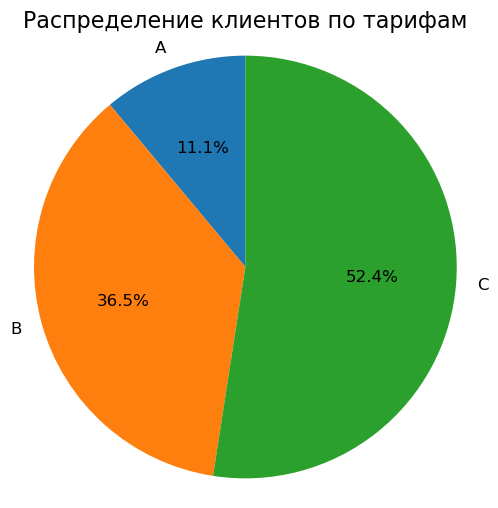

In [32]:
# Создание круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(tariff_group['user_id_count'], labels=tariff_group.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
plt.title('Распределение клиентов по тарифам', fontsize = 16)
plt.axis('equal')
plt.show()

#### Тариф А

* Расчет и визуализация данных по расходам по каждому тарифу A. Столбец по оплате
* Расчет и визуализация выручки по каждому тарифу A.
* Длительность и общие затраты по сверх-лимиту по каждому тарифу A.
* Сколько пользователей переплачивают?

In [33]:
# Формирование тарифа А, руб
monthly_fixed_payment = 4000
additional_for_operator = 50
included_in_tariff = 2000 # minutes
over_limit = 0.1
out_calls = 0.3 # кроме внутренних

In [34]:
# тариф А
# создаем таблицу с данными только для тарифа 'А' и исходящих звонков
t_A = telecon.loc[(telecon['tariff_plan'] == 'A') & (telecon['direction'] == 'out')]
display(t_A)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month
2021,166407,2019-08-14 00:00:00+03:00,out,false,888534,True,2,20,44,A,2019-08-02,8
2023,166407,2019-08-20 00:00:00+03:00,out,false,888532,True,1,0,1,A,2019-08-02,8
2024,166407,2019-08-20 00:00:00+03:00,out,true,888532,True,1,0,15,A,2019-08-02,8
2027,166407,2019-09-09 00:00:00+03:00,out,true,888532,True,6,0,22,A,2019-08-02,9
2029,166407,2019-09-10 00:00:00+03:00,out,true,888536,True,1,8,18,A,2019-08-02,9
...,...,...,...,...,...,...,...,...,...,...,...,...
48208,168361,2019-11-28 00:00:00+03:00,out,false,945282,True,65,8232,9316,A,2019-10-23,11
48209,168361,2019-11-28 00:00:00+03:00,out,false,945302,True,46,0,1291,A,2019-10-23,11
48210,168361,2019-11-28 00:00:00+03:00,out,false,945296,True,68,8345,9513,A,2019-10-23,11
48211,168361,2019-11-28 00:00:00+03:00,out,false,945298,True,14,0,410,A,2019-10-23,11


In [35]:
# Активность пользователей попробуем определить по количеству исходящих звонкам 
clients_a_active = telecon.loc[(telecon['tariff_plan'] == 'A')]
clients_a_active = clients_a_active.groupby(['user_id', 'direction']).agg({'calls_count':'sum'}).reset_index()
a_active_percent = (clients_a_active['direction'] == 'out').sum() / len(clients_a_active)
print('Доля активных пользователей по тарифному плану А:', a_active_percent)

Доля активных пользователей по тарифному плану А: 0.4426229508196721


In [36]:
# Суммарная ежемесячная продолжительность исходящих звонков для кадого клиента по тарифу А 
clients_a = t_A.groupby(['user_id', 'month', 'internal', 'operator_id', 'calls_count', 'tariff_plan']).agg({'call_duration':'sum'}).reset_index()

# переводим длительность звонков в минуты
clients_a['total_minutes'] = (clients_a['call_duration'] / 60).round(1)
clients_a

,user_id,month,internal,operator_id,calls_count,tariff_plan,call_duration,total_minutes
0,166407,8,false,888532,1,A,0,0.0
1,166407,8,false,888534,2,A,20,0.3
2,166407,8,true,888532,1,A,0,0.0
3,166407,9,false,888534,1,A,423,7.0
4,166407,9,false,888534,2,A,433,7.2
...,...,...,...,...,...,...,...,...
5287,168361,11,true,945324,1,A,4,0.1
5288,168361,11,true,965542,1,A,2,0.0
5289,168361,11,true,965542,5,A,0,0.0
5290,168361,11,true,965542,8,A,0,0.0


In [37]:
# Добавляем столбец с суммарной ежеесячной оплатой по тарифу А

# monthly_fixed_payment = 4000
# additional_for_operator = 50
# included_in_tariff = 2000 # minutes
# over_limit = 0.1
# out_calls = 0.3 # кроме внутренних

payment_by_tariff(clients_a, 4000, 50, 2000, 0.1, 0.3)
income_by_tariff(clients_a, 4000, 50, 2000, 0.1, 0.3)

extra_time_by_tariff(clients_a, 2000)
extra_cost_by_tariff(clients_a, 2000, 0.1)

clients_a

,user_id,month,internal,operator_id,calls_count,tariff_plan,call_duration,total_minutes,client_payment,income,client_over_time,client_over_payment
0,166407,8,false,888532,1,A,0,0.0,4050.00,3950.00,0.0,0.0
1,166407,8,false,888534,2,A,20,0.3,4050.09,3950.09,0.0,0.0
2,166407,8,true,888532,1,A,0,0.0,4050.00,3950.00,0.0,0.0
3,166407,9,false,888534,1,A,423,7.0,4052.10,3952.10,0.0,0.0
4,166407,9,false,888534,2,A,433,7.2,4052.16,3952.16,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5287,168361,11,true,945324,1,A,4,0.1,4050.00,3950.00,0.0,0.0
5288,168361,11,true,965542,1,A,2,0.0,4050.00,3950.00,0.0,0.0
5289,168361,11,true,965542,5,A,0,0.0,4050.00,3950.00,0.0,0.0
5290,168361,11,true,965542,8,A,0,0.0,4050.00,3950.00,0.0,0.0


In [38]:
clients_a_over_payment = clients_a.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='client_over_payment', ascending=False).head(20)
clients_a_over_payment

,client_payment,total_minutes,income,client_over_time,client_over_payment
user_id,,,,,
166582,1524110.70,139369.0,1487510.70,746.9,74.69
166407,482045.31,596.9,470145.31,0.0,0.00
167799,178376.91,589.7,173976.91,0.0,0.00
168295,60808.26,194.2,59308.26,0.0,0.00
168253,162371.82,1239.4,158371.82,0.0,0.00
168252,1347607.23,10118.8,1314407.23,0.0,0.00
168193,101269.26,67.9,98769.26,0.0,0.00
168187,2667579.06,9028.2,2601779.06,0.0,0.00
168128,24310.23,34.1,23710.23,0.0,0.00


In [39]:
# Разбивка клиентов тиарфа А на группы по сверх-лимитным оплатам
group_by_extra_cost_by_tariff(clients_a_over_payment)

,client_payment,total_minutes,income,client_over_time,client_over_payment,range
user_id,,,,,,
166582,1524110.70,139369.0,1487510.70,746.9,74.69,NaN
166407,482045.31,596.9,470145.31,0.0,0.00,NaN
167799,178376.91,589.7,173976.91,0.0,0.00,NaN
168295,60808.26,194.2,59308.26,0.0,0.00,NaN
168253,162371.82,1239.4,158371.82,0.0,0.00,NaN
168252,1347607.23,10118.8,1314407.23,0.0,0.00,NaN
168193,101269.26,67.9,98769.26,0.0,0.00,NaN
168187,2667579.06,9028.2,2601779.06,0.0,0.00,NaN
168128,24310.23,34.1,23710.23,0.0,0.00,NaN


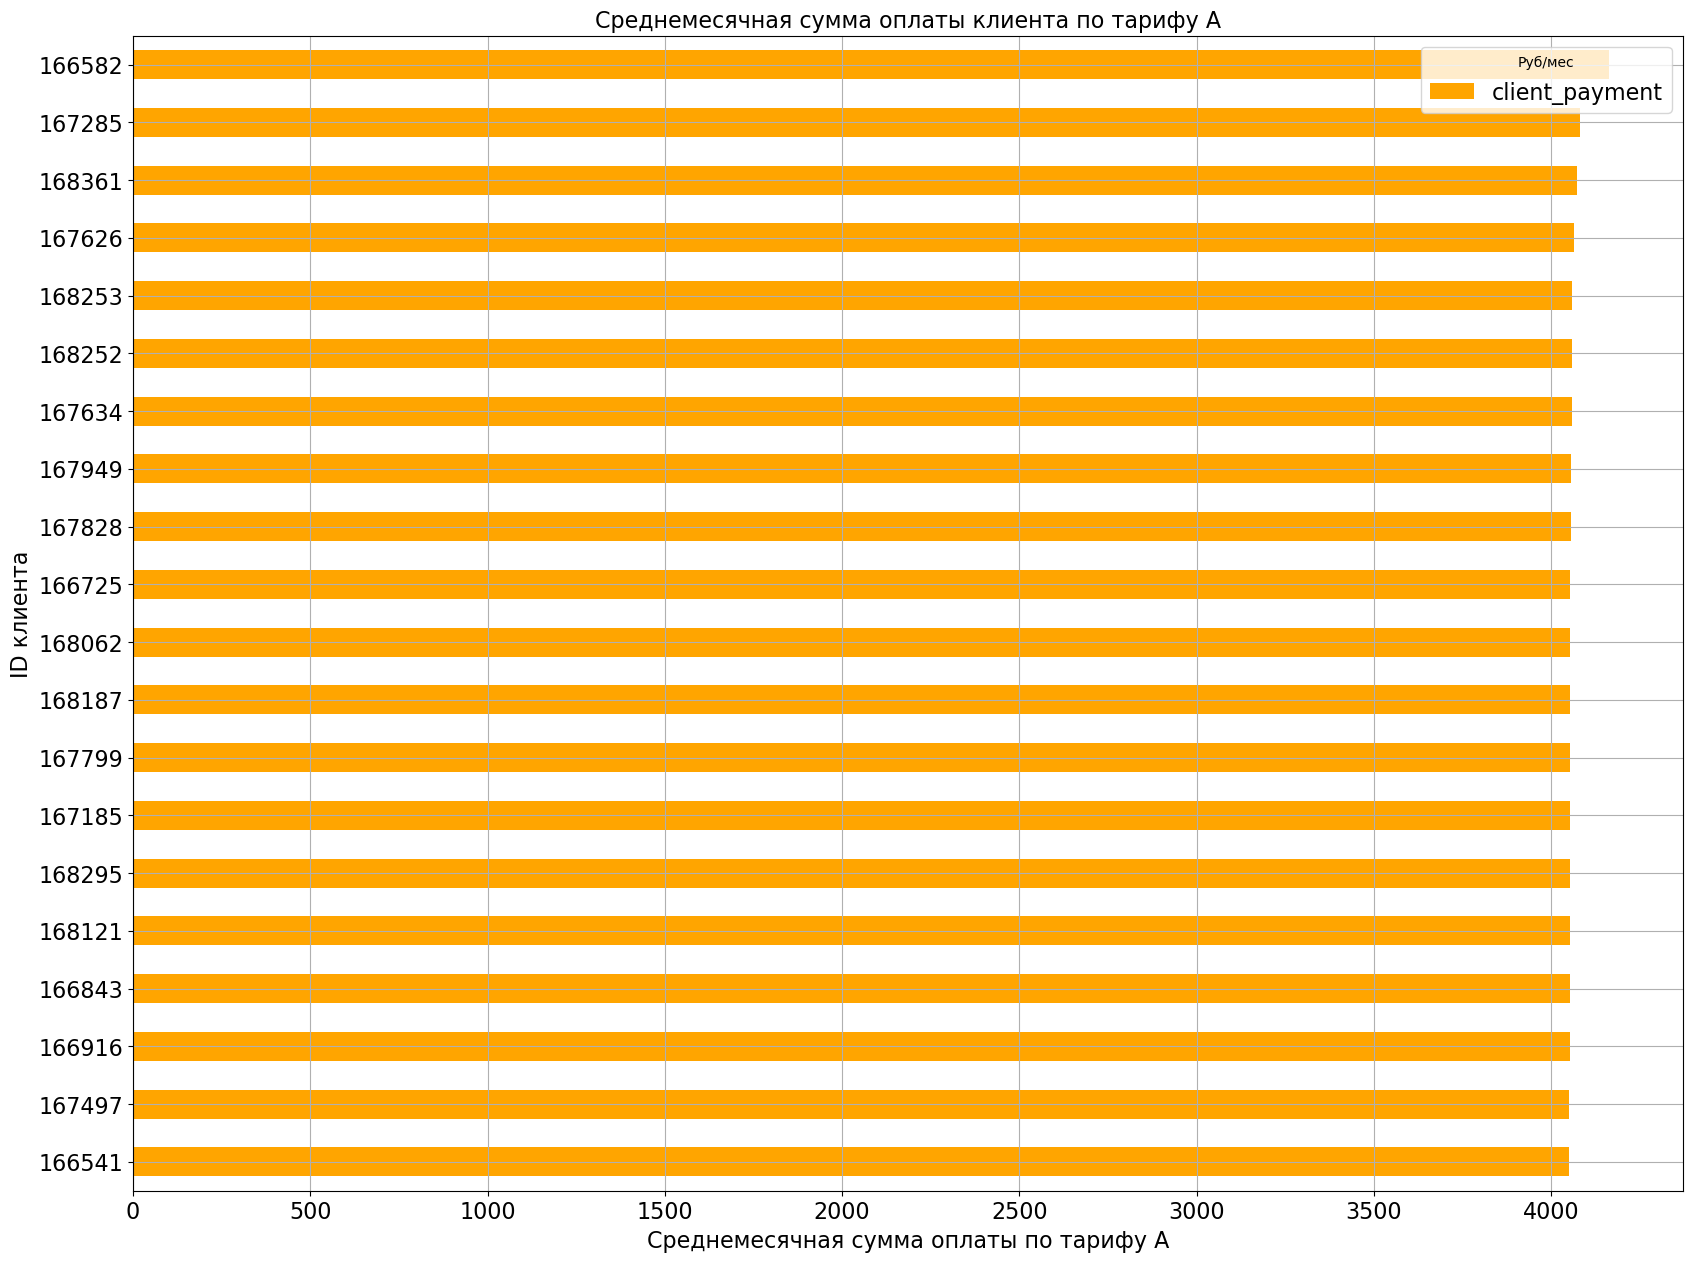

In [40]:
# Сравнительный график
sorted_payment_clients_a = clients_a.groupby('user_id')\
            .agg({'client_payment':'mean'})\
            .sort_values(by='client_payment', ascending=False).head(20)

sorted_payment_clients_a = sorted_payment_clients_a.sort_values('client_payment', ascending=True)

sorted_payment_clients_a['client_payment'].plot(kind='barh', color='orange', figsize=(20, 15))
plt.title('Среднемесячная сумма оплаты клиента по тарифу А', fontsize=16)
plt.xlabel('Среднемесячная сумма оплаты по тарифу А', fontsize=16)
plt.ylabel('ID клиента', fontsize=16)
plt.legend(title='Руб/мес', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

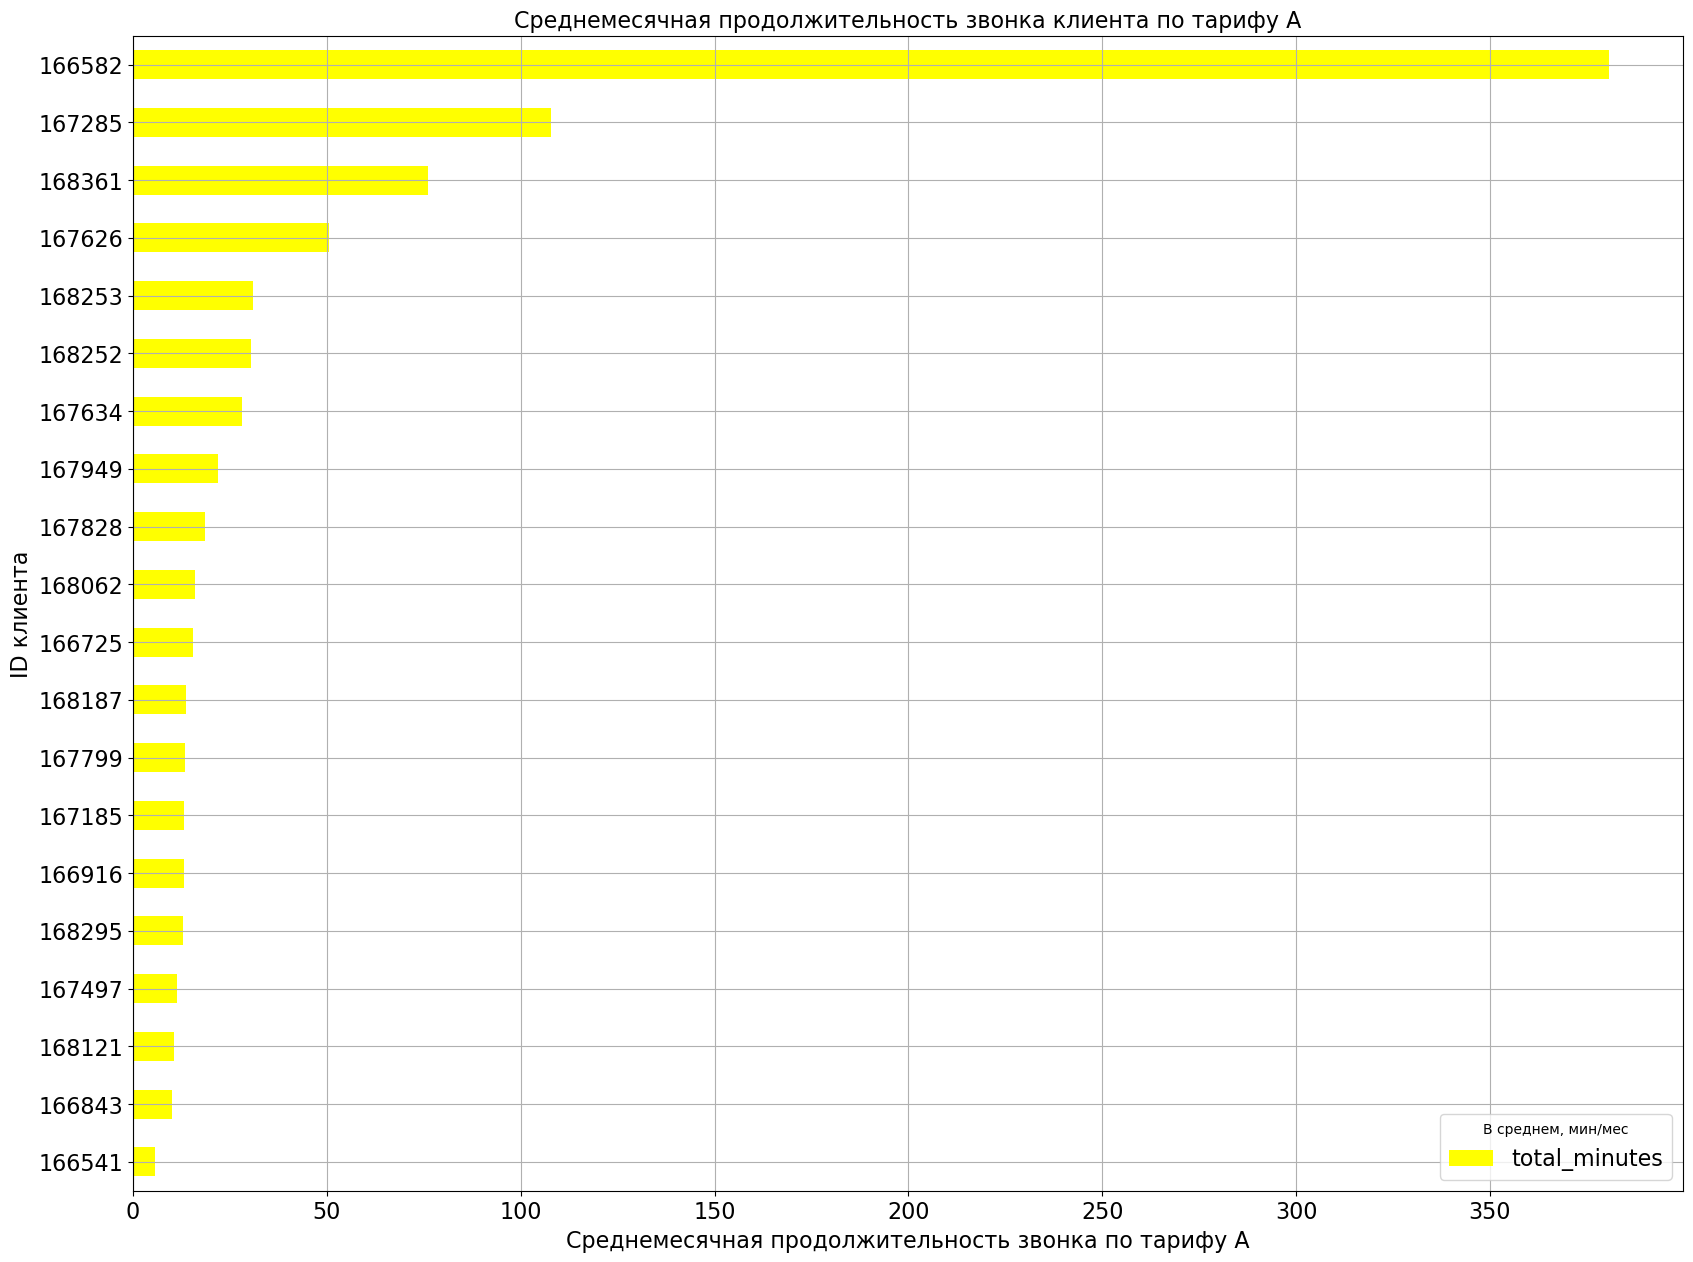

In [41]:
sorted_duration_clients_a = clients_a.groupby('user_id').agg({'total_minutes':'mean'})\
                            .sort_values(by='total_minutes', ascending=False).head(20)

sorted_duration_clients_a = sorted_duration_clients_a.sort_values('total_minutes', ascending=True)
sorted_duration_clients_a['total_minutes'].plot(kind='barh', color='yellow', figsize=(20, 15))
plt.title('Среднемесячная продолжительность звонка клиента по тарифу А', fontsize=16)
plt.xlabel('Среднемесячная продолжительность звонка по тарифу А', fontsize=16)
plt.ylabel('ID клиента', fontsize=16)
plt.legend(title='В среднем, мин/мес', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

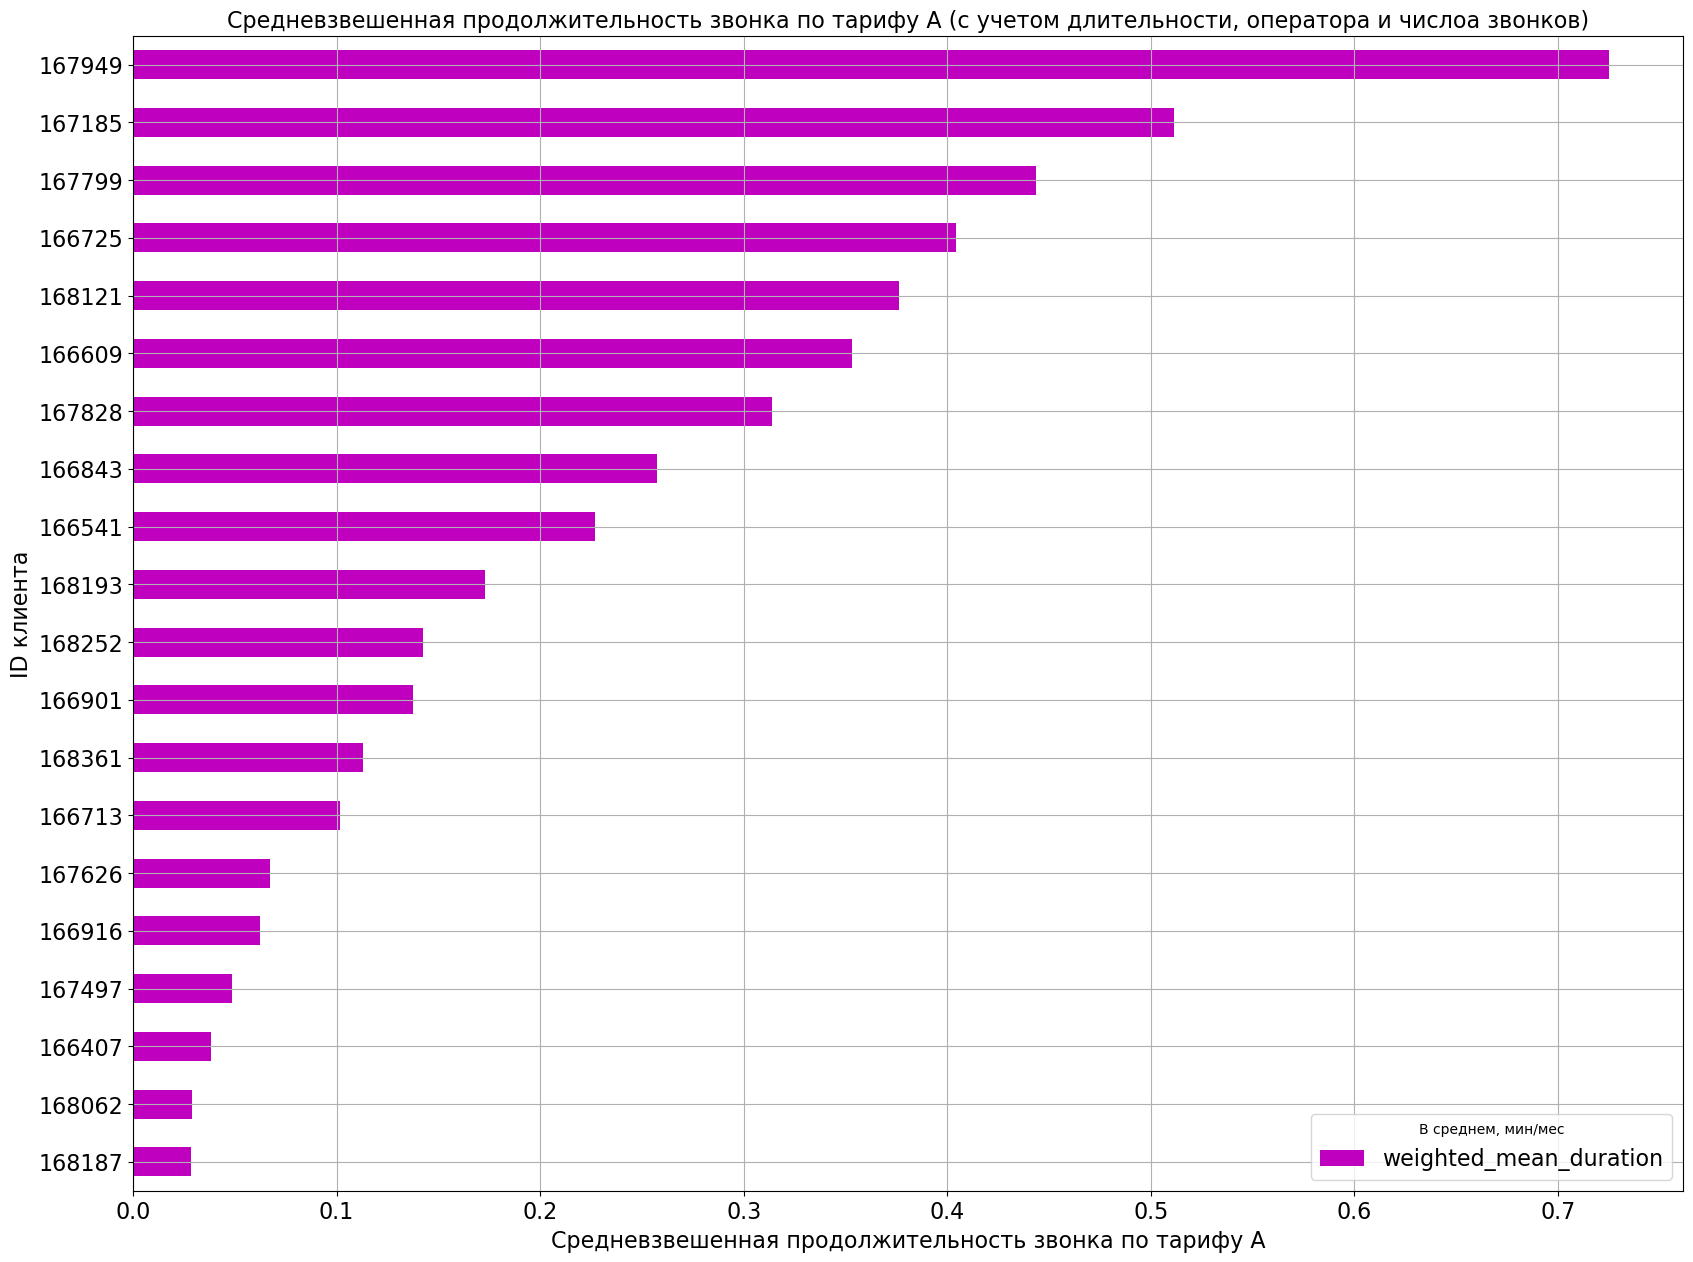

In [42]:
# Вычисляем взвешенное среднее для продолжительности звонков
clients_a['weighted_duration'] = clients_a['total_minutes'] * clients_a['operator_id'] * clients_a['calls_count']

# Группируем данные по клиентам и вычисляем взвешенное среднее продолжительности звонков
weighted_mean_duration_clients_a = clients_a.groupby('user_id')\
        .agg({'weighted_duration': 'sum', 'operator_id': 'sum', 'calls_count': 'sum'})
weighted_mean_duration_clients_a['weighted_mean_duration'] = weighted_mean_duration_clients_a['weighted_duration']/(weighted_mean_duration_clients_a['operator_id'] * weighted_mean_duration_clients_a['calls_count'])

# Сортируем и выбираем топ 20 клиентов
top_clients_a = weighted_mean_duration_clients_a.sort_values(by='weighted_mean_duration', ascending=True).head(20)

# Создаем график
top_clients_a['weighted_mean_duration'].plot(kind='barh', color='m', figsize=(20, 15))
plt.title('Средневзвешенная продолжительность звонка по тарифу А (с учетом длительности, оператора и числоа звонков)', fontsize=16)
plt.xlabel('Средневзвешенная продолжительность звонка по тарифу А', fontsize=16)
plt.ylabel('ID клиента', fontsize=16)
plt.legend(title='В среднем, мин/мес', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()


#### Тариф В

* Расчет и визуализация данных по расходам по каждому тарифу B. Столбец по оплате
* Расчет и визуализация выручки по каждому тарифу B.
* Длительность и общие затраты по сверх-лимиту по каждому тарифу B.
* Сколько пользователей переплачивают?

In [43]:
# тариф B
# создаем таблицу с данными только для тарифа 'B' и исходящих звонков
t_B = telecon.loc[(telecon['tariff_plan'] == 'B') & (telecon['direction'] == 'out')]
display(t_B)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month
1,166377,2019-08-05 00:00:00+03:00,out,true,880022,True,3,0,5,B,2019-08-01,8
2,166377,2019-08-05 00:00:00+03:00,out,true,880020,True,1,0,1,B,2019-08-01,8
3,166377,2019-08-05 00:00:00+03:00,out,true,880020,True,1,10,18,B,2019-08-01,8
4,166377,2019-08-05 00:00:00+03:00,out,false,880022,True,3,0,25,B,2019-08-01,8
5,166377,2019-08-05 00:00:00+03:00,out,false,880020,True,2,3,29,B,2019-08-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...
48875,168603,2019-11-20 00:00:00+03:00,out,false,959118,True,3,0,89,B,2019-10-31,11
48876,168603,2019-11-20 00:00:00+03:00,out,false,959118,True,3,419,478,B,2019-10-31,11
48877,168603,2019-11-21 00:00:00+03:00,out,false,959118,True,1,0,10,B,2019-10-31,11
48878,168603,2019-11-21 00:00:00+03:00,out,false,959118,True,5,338,423,B,2019-10-31,11


In [44]:
# Активность пользователей по количеству исходящих звонкам 
clients_b_active = telecon.loc[(telecon['tariff_plan'] == 'B')]
clients_b_active = clients_b_active.groupby(['user_id', 'direction']).agg({'calls_count':'sum'}).reset_index()
b_active_percent = (clients_b_active['direction'] == 'out').sum() / len(clients_b_active)
print('Доля активных пользователей по тарифному плану B:', b_active_percent)

Доля активных пользователей по тарифному плану B: 0.4371859296482412


In [45]:
# Суммарная ежемесячная продолжительность исходящих звонков для кадого клиента по тарифу B 
clients_b = t_B.groupby(['user_id', 'month', 'internal', 'tariff_plan']).agg({'call_duration':'sum'}).reset_index()

# переводим длительность звонков в минуты
clients_b['total_minutes'] = (clients_b['call_duration'] / 60).round(1)
clients_b

,user_id,month,internal,tariff_plan,call_duration,total_minutes
0,166377,8,false,B,64968,1082.8
1,166377,8,true,B,10,0.2
2,166377,9,false,B,85609,1426.8
3,166377,9,true,B,0,0.0
4,166377,10,false,B,81599,1360.0
...,...,...,...,...,...,...
313,168307,11,true,B,0,0.0
314,168481,11,false,B,280,4.7
315,168500,11,false,B,0,0.0
316,168500,11,true,B,6,0.1


In [46]:
# Добавляем столбец с суммарной ежеесячной оплатой по тарифу B

# monthly_fixed_payment = 2000
# additional_for_operator = 150
# included_in_tariff = 500 # minutes
# over_limit = 0.15
# out_calls = 0.5 # кроме внутренних

payment_by_tariff(clients_b, 2000, 150, 500, 0.15, 0.5)
income_by_tariff(clients_b, 2000, 150, 500, 0.15, 0.5)

extra_time_by_tariff(clients_b, 500)
extra_cost_by_tariff(clients_b, 500, 0.15)

clients_b

,user_id,month,internal,tariff_plan,call_duration,total_minutes,client_payment,income,client_over_time,client_over_payment
0,166377,8,false,B,64968,1082.8,2691.40,2391.40,582.8,87.42
1,166377,8,true,B,10,0.2,2150.00,1850.00,0.0,0.00
2,166377,9,false,B,85609,1426.8,2863.40,2563.40,926.8,139.02
3,166377,9,true,B,0,0.0,2150.00,1850.00,0.0,0.00
4,166377,10,false,B,81599,1360.0,2830.00,2530.00,860.0,129.00
...,...,...,...,...,...,...,...,...,...,...
313,168307,11,true,B,0,0.0,2150.00,1850.00,0.0,0.00
314,168481,11,false,B,280,4.7,2152.35,1852.35,0.0,0.00
315,168500,11,false,B,0,0.0,2150.00,1850.00,0.0,0.00
316,168500,11,true,B,6,0.1,2150.00,1850.00,0.0,0.00


In [47]:
clients_b_over_payment = clients_b.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='client_over_payment', ascending=False).head(20)
clients_b_over_payment

,client_payment,total_minutes,income,client_over_time,client_over_payment
user_id,,,,,
166658,33612.650,32825.3,31212.650,30825.3,4623.795
166405,21469.950,12845.0,19369.950,10839.9,1625.985
166485,17939.950,6360.1,15839.950,4222.7,633.405
166406,17648.550,5219.0,15548.550,3197.1,479.565
166377,19786.800,5175.8,17386.800,3173.6,476.040
166680,14978.400,4156.8,13178.400,3059.0,458.850
168025,6023.750,3447.5,5423.750,2947.5,442.125
168091,5919.935,3809.8,5319.935,2709.9,406.485
168154,5753.300,2906.6,5153.300,1977.9,296.685


In [48]:
# Разбивка клиентов тиарфа В на группы по сверх-лимитным оплатам
group_by_extra_cost_by_tariff(clients_b_over_payment)

,client_payment,total_minutes,income,client_over_time,client_over_payment,range
user_id,,,,,,
166658,33612.650,32825.3,31212.650,30825.3,4623.795,1001-100000
166405,21469.950,12845.0,19369.950,10839.9,1625.985,1001-100000
166485,17939.950,6360.1,15839.950,4222.7,633.405,101-1000
166406,17648.550,5219.0,15548.550,3197.1,479.565,101-1000
166377,19786.800,5175.8,17386.800,3173.6,476.040,101-1000
166680,14978.400,4156.8,13178.400,3059.0,458.850,101-1000
168025,6023.750,3447.5,5423.750,2947.5,442.125,101-1000
168091,5919.935,3809.8,5319.935,2709.9,406.485,101-1000
168154,5753.300,2906.6,5153.300,1977.9,296.685,101-1000


In [49]:
# Переплачивающие клиенты 166658 и 166405
clients_b_overspending_client_one = clients_b.loc[(clients_b['user_id'] == 166658)]

print('Доля переплаты для клиента 166658:')
percent_ovepaid_166658 = clients_b_overspending_client_one['client_over_payment'].sum()/clients_b_overspending_client_one['client_payment'].sum()
print(percent_ovepaid_166658.round(2))

Доля переплаты для клиента 166658:
0.14


In [50]:
# Переплачивающие клиенты 166658 и 166405
clients_b_overspending_client_one = clients_b.loc[(clients_b['user_id'] == 166405)]

print('Доля переплаты для клиента 166405:')
percent_ovepaid_166405 = clients_b_overspending_client_one['client_over_payment'].sum()/clients_b_overspending_client_one['client_payment'].sum()
print(percent_ovepaid_166405.round(2))

Доля переплаты для клиента 166405:
0.08


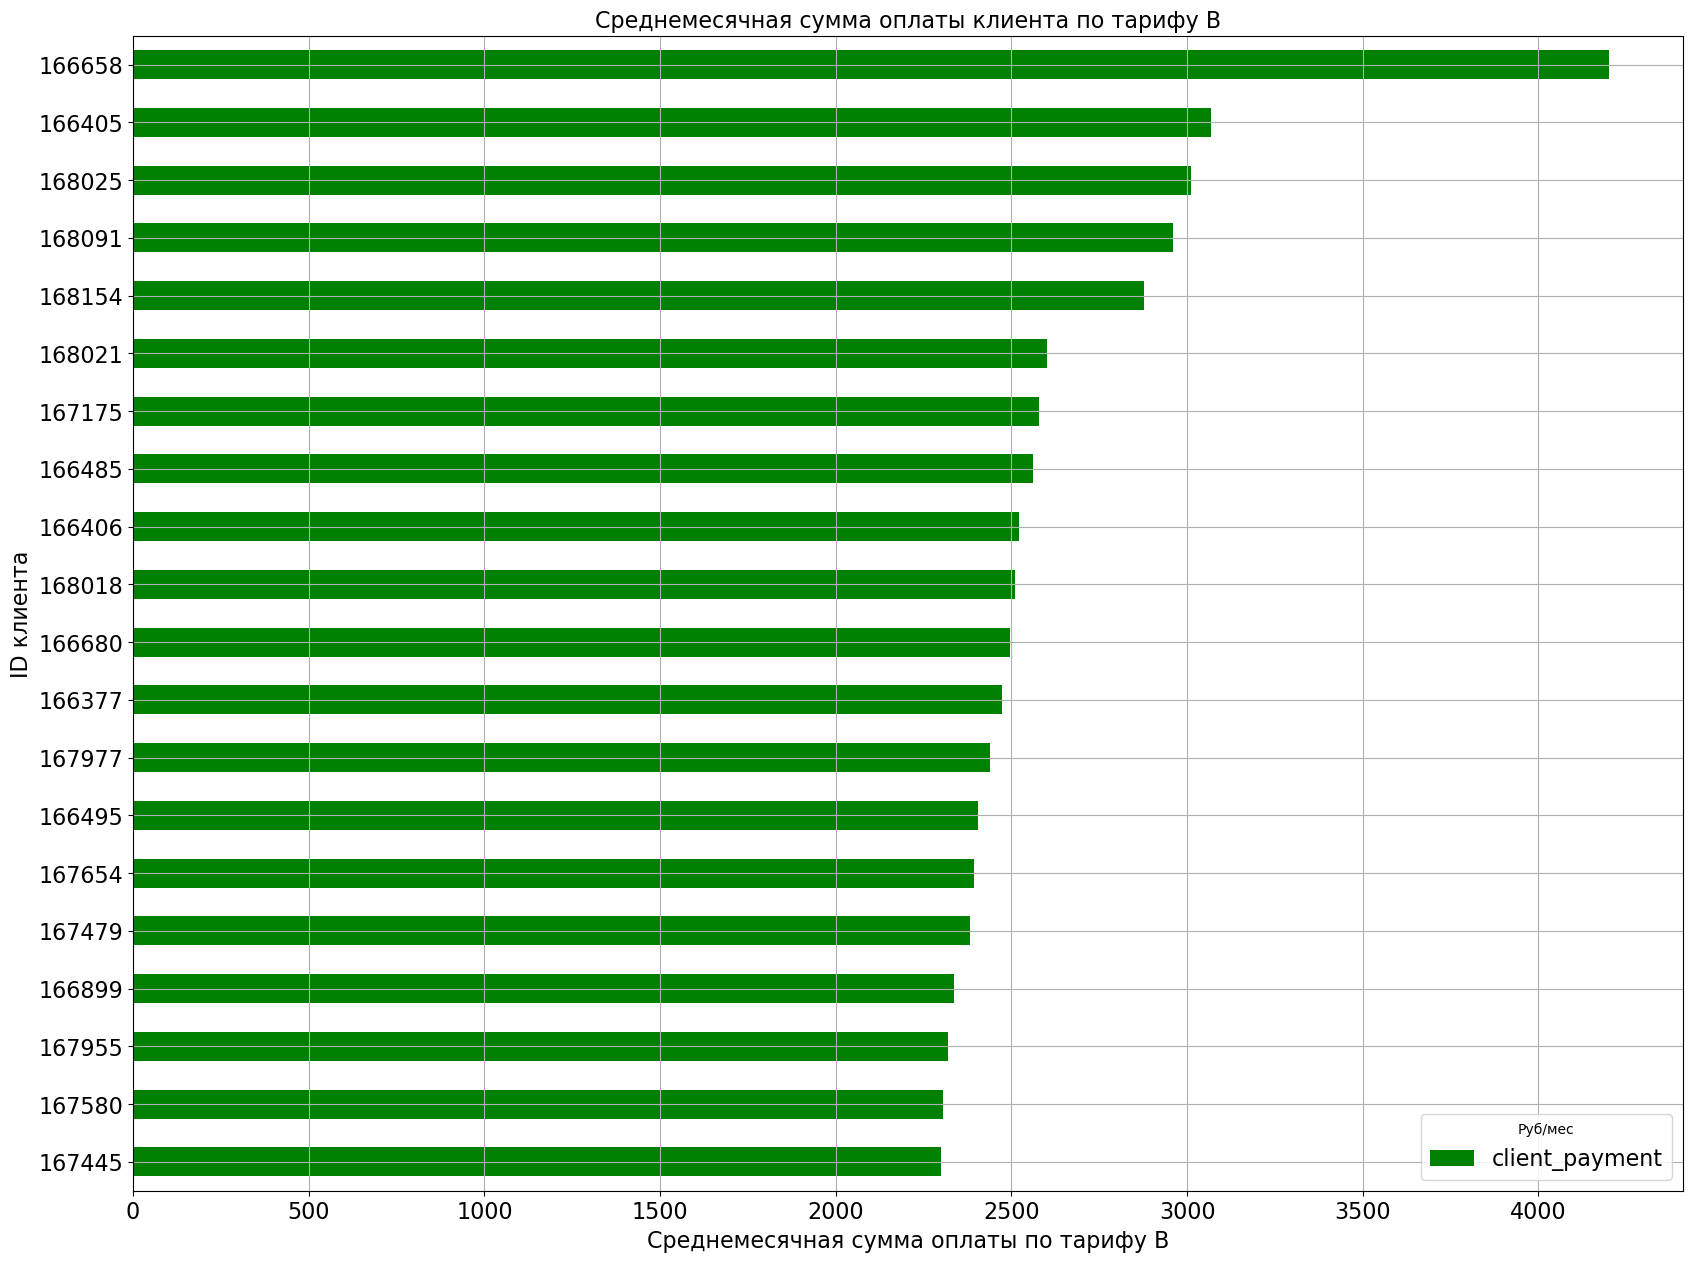

In [51]:
# Сравнительный график
sorted_payment_clients_b = clients_b.groupby('user_id')\
            .agg({'client_payment':'mean'})\
            .sort_values(by='client_payment', ascending=False).head(20)
sorted_payment_clients_b = sorted_payment_clients_b.sort_values('client_payment', ascending=True)
sorted_payment_clients_b['client_payment'].plot(kind='barh', color='green', figsize=(20, 15))
plt.title('Среднемесячная сумма оплаты клиента по тарифу B', fontsize=16)
plt.xlabel('Среднемесячная сумма оплаты по тарифу B', fontsize=16)
plt.ylabel('ID клиента', fontsize=16)
plt.legend(title='Руб/мес', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

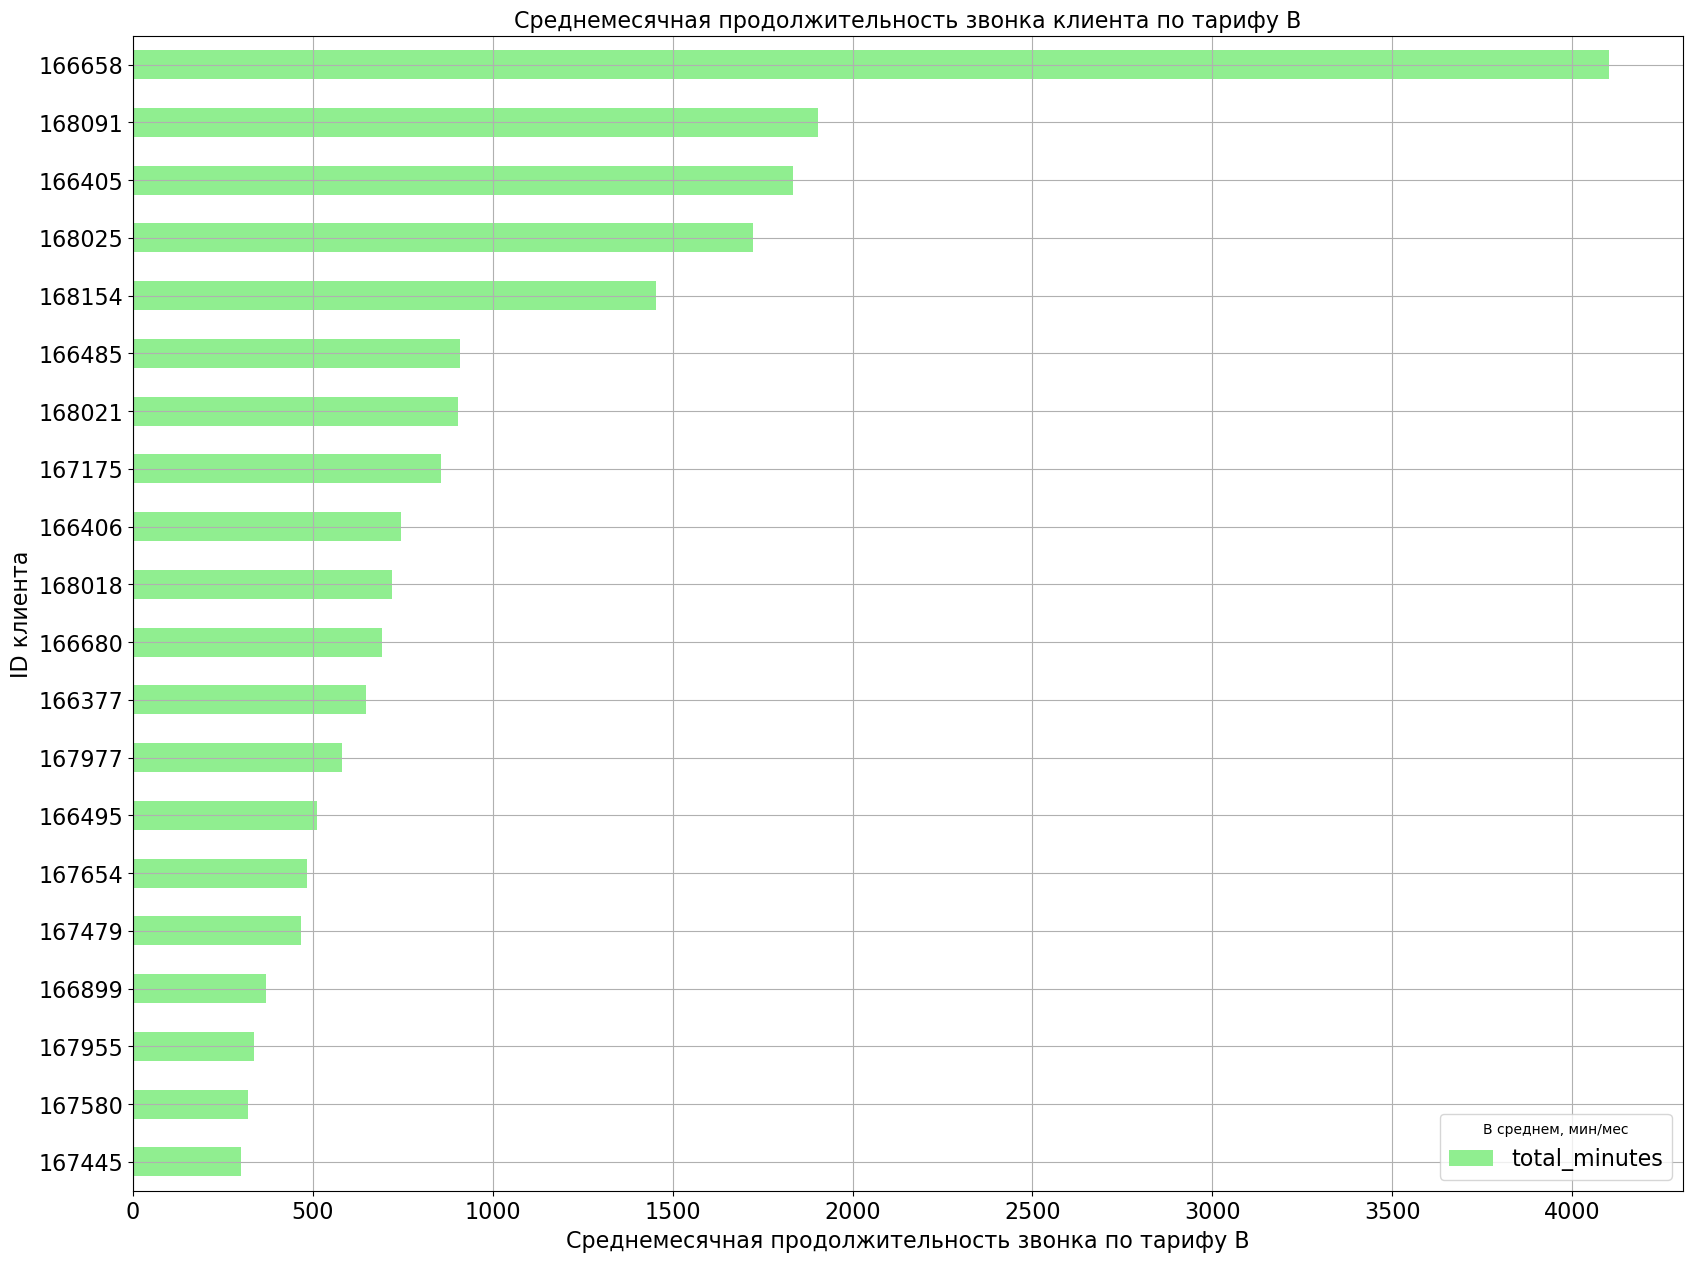

In [52]:
sorted_duration_clients_b = clients_b.groupby('user_id').agg({'total_minutes':'mean'})\
            .sort_values(by='total_minutes', ascending=False).head(20)
sorted_duration_clients_b = sorted_duration_clients_b.sort_values('total_minutes', ascending=True)
sorted_duration_clients_b['total_minutes'].plot(kind='barh', color='lightgreen', figsize=(20, 15))
plt.title('Среднемесячная продолжительность звонка клиента по тарифу B', fontsize=16)
plt.xlabel('Среднемесячная продолжительность звонка по тарифу B', fontsize=16)
plt.ylabel('ID клиента', fontsize=16)
plt.legend(title='В среднем, мин/мес', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

#### Тариф С

* Расчет и визуализация данных по расходам по каждому тарифу C. Столбец по оплате
* Расчет и визуализация выручки по каждому тарифу C.
* Длительность и общие затраты по сверх-лимиту по каждому тарифу C.
* Сколько пользователей переплачивают?

In [53]:
# тариф C
# создаем таблицу с данными только для тарифа 'B' и исходящих звонков
t_C = telecon.loc[(telecon['tariff_plan'] == 'C') & (telecon['direction'] == 'out')]
display(t_C)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month
523,166391,2019-08-07 00:00:00+03:00,out,true,882478,True,1,0,7,C,2019-08-01,8
3352,166487,2019-11-12 00:00:00+03:00,out,false,959312,True,1,6,19,C,2019-08-06,11
3354,166487,2019-11-12 00:00:00+03:00,out,false,959312,True,7,0,120,C,2019-08-06,11
3357,166487,2019-11-18 00:00:00+03:00,out,false,959312,True,3,0,51,C,2019-08-06,11
3360,166487,2019-11-18 00:00:00+03:00,out,false,959312,True,2,286,317,C,2019-08-06,11
...,...,...,...,...,...,...,...,...,...,...,...,...
48886,168606,2019-11-09 00:00:00+03:00,out,false,957922,True,4,551,593,C,2019-10-31,11
48887,168606,2019-11-10 00:00:00+03:00,out,true,957922,True,1,0,25,C,2019-10-31,11
48888,168606,2019-11-10 00:00:00+03:00,out,true,957922,True,1,0,38,C,2019-10-31,11
48889,168606,2019-11-11 00:00:00+03:00,out,true,957922,True,2,479,501,C,2019-10-31,11


In [54]:
# Активность пользователей по количеству исходящих звонкам 
clients_c_active = telecon.loc[(telecon['tariff_plan'] == 'C')]
clients_c_active = clients_c_active.groupby(['user_id', 'direction']).agg({'calls_count':'sum'}).reset_index()
c_active_percent = (clients_c_active['direction'] == 'out').sum() / len(clients_c_active)
print('Доля активных пользователей по тарифному плану C:', c_active_percent)

Доля активных пользователей по тарифному плану C: 0.40148698884758366


In [55]:
# Суммарная ежемесячная продолжительность исходящих звонков для кадого клиента по тарифу B 
clients_c = t_C.groupby(['user_id', 'month', 'internal', 'tariff_plan']).agg({'call_duration':'sum'}).reset_index()

# переводим длительность звонков в минуты
clients_c['total_minutes'] = (clients_c['call_duration'] / 60).round(1)
clients_c

,user_id,month,internal,tariff_plan,call_duration,total_minutes
0,166391,8,true,C,0,0.0
1,166487,11,false,C,5493,91.6
2,166487,11,true,C,0,0.0
3,166507,8,false,C,70,1.2
4,166511,8,false,C,17866,297.8
...,...,...,...,...,...,...
351,168473,11,false,C,237,4.0
352,168601,11,false,C,24264,404.4
353,168601,11,true,C,0,0.0
354,168606,11,false,C,806,13.4


In [56]:
# Добавляем столбец с суммарной ежеесячной оплатой по тарифу C

# monthly_fixed_payment = 1000
# additional_for_operator = 300
# included_in_tariff = 0 # minutes
# over_limit = 0.3
# out_calls = 0.7 # кроме внутренних

payment_by_tariff(clients_c, 1000, 300, 0, 0.3, 0.7)
income_by_tariff(clients_c, 1000, 300, 0, 0.3, 0.7)

extra_time_by_tariff(clients_c, 0)
extra_cost_by_tariff(clients_c, 0, 0.15)

clients_c

,user_id,month,internal,tariff_plan,call_duration,total_minutes,client_payment,income,client_over_time,client_over_payment
0,166391,8,true,C,0,0.0,1300.00,700.00,0.0,0.00
1,166487,11,false,C,5493,91.6,1364.12,764.12,91.6,13.74
2,166487,11,true,C,0,0.0,1300.00,700.00,0.0,0.00
3,166507,8,false,C,70,1.2,1300.84,700.84,1.2,0.18
4,166511,8,false,C,17866,297.8,1508.46,908.46,297.8,44.67
...,...,...,...,...,...,...,...,...,...,...
351,168473,11,false,C,237,4.0,1302.80,702.80,4.0,0.60
352,168601,11,false,C,24264,404.4,1583.08,983.08,404.4,60.66
353,168601,11,true,C,0,0.0,1300.00,700.00,0.0,0.00
354,168606,11,false,C,806,13.4,1309.38,709.38,13.4,2.01


In [57]:
clients_c_over_payment = clients_c.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='client_over_payment', ascending=False).head(30)
clients_c_over_payment

,client_payment,total_minutes,income,client_over_time,client_over_payment
user_id,,,,,
167125,14658.33,13511.9,12258.33,13511.9,2026.785
167827,11775.91,11251.3,9975.91,11251.3,1687.695
166511,16039.20,8060.4,11239.20,8052.7,1207.905
166983,13238.64,7880.8,9638.64,7686.0,1152.900
167888,10421.37,7459.1,8021.37,7459.1,1118.865
167011,9347.22,5924.6,6947.22,5924.6,888.690
167150,11873.91,6166.5,8273.91,5559.9,833.985
166997,9982.17,5005.5,6982.17,4951.3,742.695
166520,11904.82,4009.0,7704.82,4005.3,600.795


In [58]:
# Разбивка клиентов тиарфа С на группы по сверх-лимитным оплатам
group_by_extra_cost_by_tariff(clients_c_over_payment)

,client_payment,total_minutes,income,client_over_time,client_over_payment,range
user_id,,,,,,
167125,14658.33,13511.9,12258.33,13511.9,2026.785,1001-100000
167827,11775.91,11251.3,9975.91,11251.3,1687.695,1001-100000
166511,16039.20,8060.4,11239.20,8052.7,1207.905,1001-100000
166983,13238.64,7880.8,9638.64,7686.0,1152.900,1001-100000
167888,10421.37,7459.1,8021.37,7459.1,1118.865,1001-100000
167011,9347.22,5924.6,6947.22,5924.6,888.690,101-1000
167150,11873.91,6166.5,8273.91,5559.9,833.985,101-1000
166997,9982.17,5005.5,6982.17,4951.3,742.695,101-1000
166520,11904.82,4009.0,7704.82,4005.3,600.795,101-1000


In [59]:
# user_id	client_over_payment	range
# 167125	2026.785	1001-100000
# 167827	1687.695	1001-100000
# 166511	1207.905	1001-100000
# 166983	1152.900	1001-100000
# 167888	1118.865	1001-100000



In [60]:
# Переплачивающие клиенты 166658 и 166405
def overspending_c (user_id):
    overspending_client = clients_c.loc[(clients_c['user_id'] == user_id)]
    print('Доля переплаты для клиента', user_id)
    percent_ovepaid = overspending_client['client_over_payment'].sum()/overspending_client['client_payment'].sum()
    print(percent_ovepaid.round(2))
    return None

In [61]:
overspending_c(167125)

Доля переплаты для клиента 167125
0.14


In [62]:
overspending_c(167827)

Доля переплаты для клиента 167827
0.14


In [63]:
overspending_c(166511)

Доля переплаты для клиента 166511
0.08


In [64]:
overspending_c(166983)

Доля переплаты для клиента 166983
0.09


In [65]:
overspending_c(167888)

Доля переплаты для клиента 167888
0.11


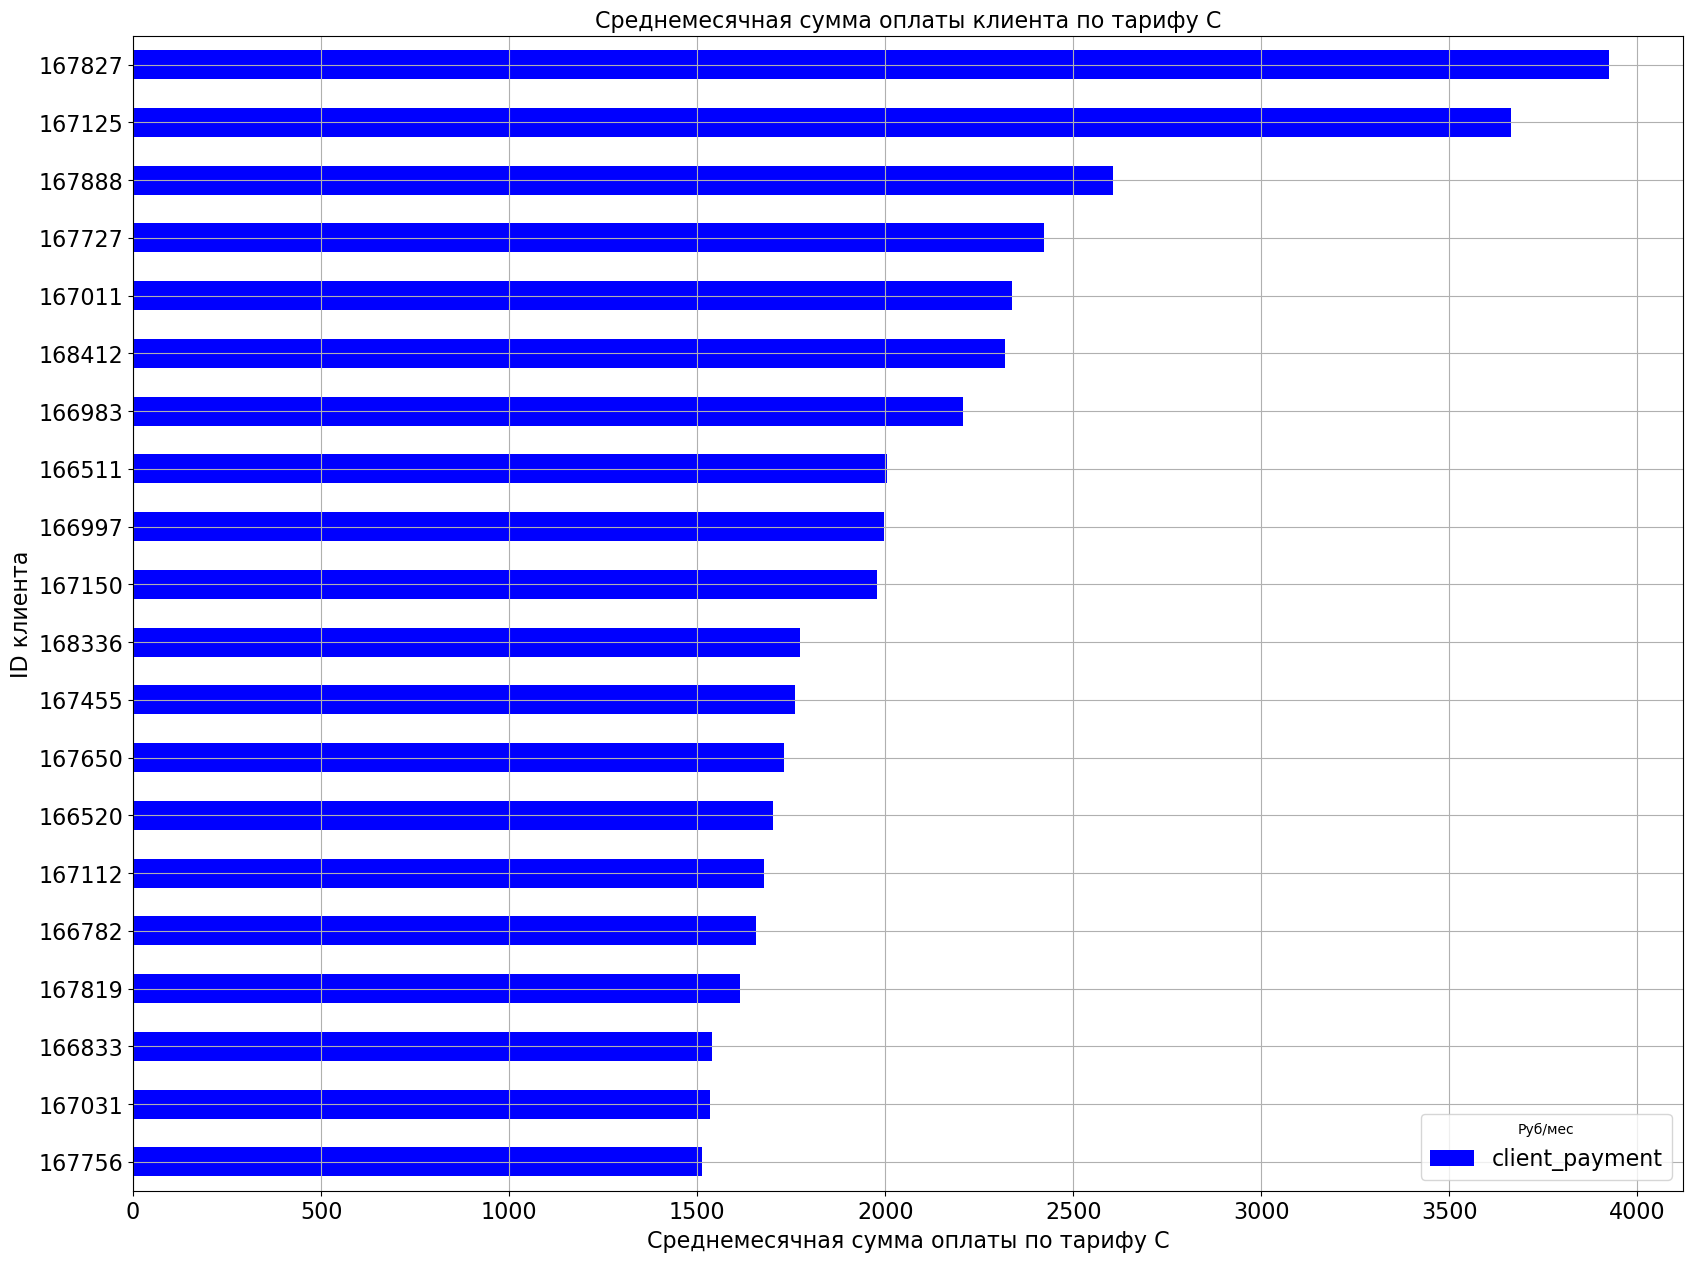

In [66]:
# Сравнительный график
sorted_payment_clients_c = clients_c.groupby('user_id').agg({'client_payment':'mean'})\
                            .sort_values(by='client_payment', ascending=False).head(20)
sorted_payment_clients_c.sort_values(by='client_payment').plot(kind='barh', color='blue', figsize=(20, 15))
plt.title('Среднемесячная сумма оплаты клиента по тарифу C', fontsize=16)
plt.xlabel('Среднемесячная сумма оплаты по тарифу C', fontsize=16)
plt.ylabel('ID клиента', fontsize=16)
plt.legend(title='Руб/мес', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

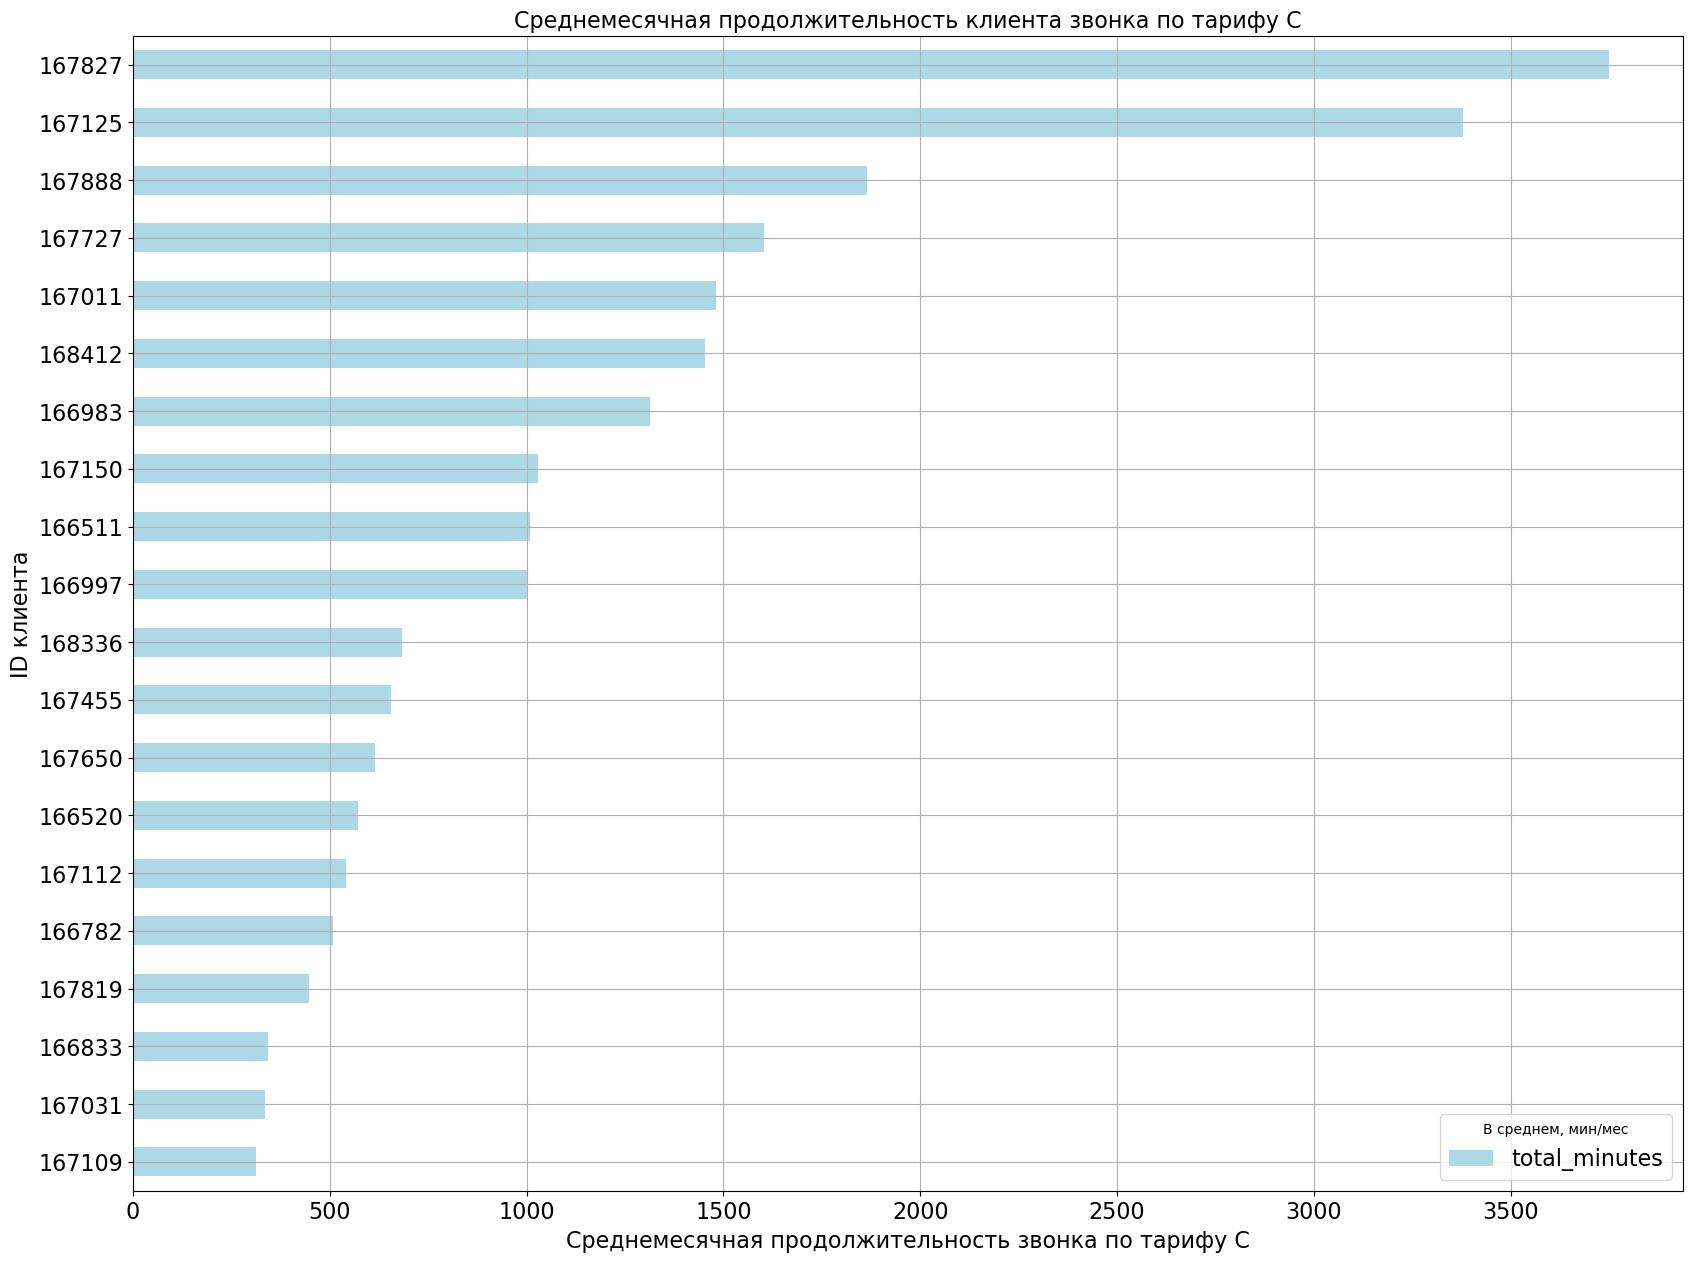

In [67]:
sorted_duration_clients_c = clients_c.groupby('user_id').agg({'total_minutes':'mean'})\
            .sort_values(by='total_minutes', ascending=False).head(20)
sorted_duration_clients_c.sort_values(by='total_minutes').plot(kind='barh', color='lightblue', figsize=(20, 15))
plt.title('Среднемесячная продолжительность клиента звонка по тарифу C', fontsize=16)
plt.xlabel('Среднемесячная продолжительность звонка по тарифу C', fontsize=16)
plt.ylabel('ID клиента', fontsize=16)
plt.legend(title='В среднем, мин/мес', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.show()

#### Средние затраты по тарифам

In [68]:
merged_abc = pd.concat([clients_a, clients_b, clients_c], ignore_index=True)
merged_abc

,user_id,month,internal,operator_id,calls_count,tariff_plan,call_duration,total_minutes,client_payment,income,client_over_time,client_over_payment,weighted_duration
0,166407,8,false,888532.0,1.0,A,0,0.0,4050.00,3950.00,0.0,0.00,0.0
1,166407,8,false,888534.0,2.0,A,20,0.3,4050.09,3950.09,0.0,0.00,533120.4
2,166407,8,true,888532.0,1.0,A,0,0.0,4050.00,3950.00,0.0,0.00,0.0
3,166407,9,false,888534.0,1.0,A,423,7.0,4052.10,3952.10,0.0,0.00,6219738.0
4,166407,9,false,888534.0,2.0,A,433,7.2,4052.16,3952.16,0.0,0.00,12794889.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,168473,11,false,NaN,NaN,C,237,4.0,1302.80,702.80,4.0,0.60,NaN
5962,168601,11,false,NaN,NaN,C,24264,404.4,1583.08,983.08,404.4,60.66,NaN
5963,168601,11,true,NaN,NaN,C,0,0.0,1300.00,700.00,0.0,0.00,NaN
5964,168606,11,false,NaN,NaN,C,806,13.4,1309.38,709.38,13.4,2.01,NaN


In [69]:
# # Сравнительная таблица средних расходов пользователей по тарифам.

average_payment = merged_abc.pivot_table(index='tariff_plan', values='client_payment', aggfunc='mean')\
                    .sort_values(by='client_payment', ascending=False)
average_payment = average_payment.reset_index().rename_axis(None, axis=1)
print('Сравнительная таблица средних расходов пользователей по тарифам:')
average_payment

Сравнительная таблица средних расходов пользователей по тарифам:


,tariff_plan,client_payment
0,A,4067.298305
1,B,2330.308129
2,C,1527.132303


In [70]:
# # Сравнительная таблица средней выручки провайдера по тарифам.

average_income = merged_abc.pivot_table(index='tariff_plan', values='income', aggfunc='mean')\
                    .sort_values(by='income', ascending=False)
average_income = average_income.reset_index().rename_axis(None, axis=1)
print('Сравнительная таблица средней выручки провайдера по тарифам:')
average_income

Сравнительная таблица средней выручки провайдера по тарифам:


,tariff_plan,income
0,A,3967.298305
1,B,2030.308129
2,C,927.132303


#### Промежуточные итоги

<font color = 'blue'> Промежуточные итоги:<br>
    
* Распределение клиентов по тарифам
|Тариф|Количество пользователей|Доля|
|:-|:-:|-:|
|А|34|11.1%|
|В|112|36.5%|
|С|161|52.4%|

Доля активных пользователей рассчитана по количеству исходящих звонков: <br>
* Доля активных пользователей по тарифному плану А: 0.44
* Доля активных пользователей по тарифному плану В: 0.44
* Доля активных пользователей по тарифному плану С: 0.40 <br>
    
Количество клиеннтов, которые переплатили свыше 1000 руб за рассматриваемый период на текущих тарифах: <br>
* По тарифному плану А нет переплачивающих клиентов свыше 1000 руб, также нет и свыше 100 руб:  
  <p></p>
* По тарифу В переплата свыше 1000 руб у 2-х клиентов:
|user_id|client_over_payment|range
|:-|:-:|-:|						
|166658|4623.795|1001-100000
|166405|1625.985|1001-100000<br>
    
Доля переплаты для клиента 166658: 0.14<br>
Доля переплаты для клиента 166405: 0.08<br>
Клиенты, указанные выше на тарифе В переплачивают не больше 15% от всей суммы своих затрат за рассмтариваемый период.<br>

* По тарифному плану С свыше 1000 руб переплатили 5 клиентов:
|user_id|client_over_payment|range
|:-|:-:|-:|						
|167125|2026.785|1001-100000
|167827|1687.695|1001-100000
|166511|1207.905|1001-100000
|166983|1152.900|1001-100000
|167888|1118.865|1001-100000<br>

Доля переплаты для клиента 167125: 0.14<br>
Доля переплаты для клиента 167827: 0.14<br>
Доля переплаты для клиента 166511: 0.08<br>
Доля переплаты для клиента 166983: 0.09<br>
Доля переплаты для клиента 167888: 0.11<br>
Клиенты, указанные выше на тарифе C переплачивают не больше 15% от всей суммы своих затрат за рассмтариваемый период.<br>
    
* Средняя величина суммы оплаты пользователей по тарифам:
|tariff_plan|client_payment
|:-|-:|	
|A|4067
|B|2330
|C|1527

* Сравнительная таблица средней выручки провайдера по тарифам:
|tariff_plan|income
|:-|-:|	
|A|3967
|B|2030
|C|927
    </font>

### Статистические гипотезы

1. Проверить гипотезу: цена услуг различается на тарифных планах A и B. <br>
2. Проверить статистическую гипотезу: разницы в сумме переплаты между тарифами нет.<br>
3. Сделать промежуточные выводы.

#### Проверка гипотезы: цена услуг различается на тарифных планах A и B

In [71]:
# Проверим нулевую гипотезу Н0: в стоимостях услуг на тарифных планах A и B нет существенной разницы;

print('Нулевая гипотеза Н0 - в стоимостях услуг на тарифных планах A и B нет существенной разницы')
print()

alpha = 0.05

results = st.ttest_ind(clients_a['client_payment'], clients_b['client_payment']) #, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Есть разница в стоимостях услуг на тарифных планах A и B. Отвергаем нулевую гипотезу')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')

Нулевая гипотеза Н0 - в стоимостях услуг на тарифных планах A и B нет существенной разницы

p-value: 0.0
Вывод: Есть разница в стоимостях услуг на тарифных планах A и B. Отвергаем нулевую гипотезу


<font color = blue>Проверка гипотезы различия стоимостей услуг на других тарифных планах: </font>

In [72]:
# Проверим нулевую гипотезу Н0: в стоимостях услуг на тарифных планах A и С нет существенной разницы;

print('Нулевая гипотеза Н0 - в стоимостях услуг на тарифных планах A и С нет существенной разницы')
print()

alpha = 0.05

results = st.ttest_ind(clients_a['client_payment'], clients_c['client_payment']) #, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Есть разница в стоимостях услуг на тарифных планах A и С. Отвергаем нулевую гипотезу')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')

Нулевая гипотеза Н0 - в стоимостях услуг на тарифных планах A и С нет существенной разницы

p-value: 0.0
Вывод: Есть разница в стоимостях услуг на тарифных планах A и С. Отвергаем нулевую гипотезу


In [73]:
# Проверим нулевую гипотезу Н0: в стоимостях услуг на тарифных планах B и С нет существенной разницы;

print('Нулевая гипотеза Н0 - в стоимостях услуг на тарифных планах B и С нет существенной разницы')
print()

alpha = 0.05

results = st.ttest_ind(clients_b['client_payment'], clients_c['client_payment']) #, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Есть разница в стоимостях услуг на тарифных планах B и С. Отвергаем нулевую гипотезу')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')

Нулевая гипотеза Н0 - в стоимостях услуг на тарифных планах B и С нет существенной разницы

p-value: 1.0897529290457677e-55
Вывод: Есть разница в стоимостях услуг на тарифных планах B и С. Отвергаем нулевую гипотезу


#### Статистическая гипотеза: разницы в сумме переплаты между тарифами нет.

In [74]:
# Проверим нулевую гипотезу Н0: в суммах переплаты на тарифных планах А и В нет существенной разницы;

print('Нулевая гипотеза Н0 - в суммах переплаты на тарифных планах А и В нет существенной разницы')
print()

alpha = 0.05

results = st.ttest_ind(clients_a['client_over_payment'], clients_b['client_over_payment']) #, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Отвергаем нулевую гипотезу. Есть разница в суммах переплаты на тарифных планах А и В.')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')

Нулевая гипотеза Н0 - в суммах переплаты на тарифных планах А и В нет существенной разницы

p-value: 5.7063940127850214e-58
Вывод: Отвергаем нулевую гипотезу. Есть разница в суммах переплаты на тарифных планах А и В.


In [75]:
# Проверим нулевую гипотезу Н0: в суммах переплаты на тарифных планах А и C нет существенной разницы;

print('Нулевая гипотеза Н0 - в суммах переплаты на тарифных планах А и C нет существенной разницы')
print()

alpha = 0.05

results = st.ttest_ind(clients_a['client_over_payment'], clients_c['client_over_payment']) #, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Отвергаем нулевую гипотезу. Есть разница в суммах переплаты на тарифных планах А и C.')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')

Нулевая гипотеза Н0 - в суммах переплаты на тарифных планах А и C нет существенной разницы

p-value: 2.1419237290155993e-137
Вывод: Отвергаем нулевую гипотезу. Есть разница в суммах переплаты на тарифных планах А и C.


In [76]:
# Проверим нулевую гипотезу Н0: в суммах переплаты на тарифных планах B и C нет существенной разницы;

print('Нулевая гипотеза Н0 - в суммах переплаты на тарифных планах B и C нет существенной разницы')
print()

alpha = 0.05

results = st.ttest_ind(clients_b['client_over_payment'], clients_c['client_over_payment']) #, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Вывод: Отвергаем нулевую гипотезу. Есть разница в суммах переплаты на тарифных планах B и C.')
else:
    print('Вывод: Нет оснований отвергнуть нулевую гипотезу')

Нулевая гипотеза Н0 - в суммах переплаты на тарифных планах B и C нет существенной разницы

p-value: 0.20151530490015662
Вывод: Нет оснований отвергнуть нулевую гипотезу


#### Промежуточные итоги

<font color = blue> 
    1. Отвергаем нулевую гипотезу Н0 о том, что в стоимостях услуг на тарифных планах А и В нет существенной разницы. <br>
Также проверили аналогичную гипотезу по тарифам А и С, В и С.<br>
Есть разница в стоимостях услуг на тарифных планах A и B, А и С, В и С. <p></p>
    2. Вторая гипотеза, что в суммах переплаты на тарифных планах А и В нет существенной разницы, не подтверждена для тарифов A и B, А и С. <br>
    Только в суммах переплаты на тарифных планах B и C нет существенной разницы, нет оснований отвергнуть гипотезу для данных тарифов.</font>

### Переход клиентов на другой тариф

Найти клиентов, которые сэкономят, если перейдут на более дорогой тариф

#### Сравнение тарифов А и В

In [77]:
# тариф А

# monthly_fixed_payment = 4000
# additional_for_operator = 50
# included_in_tariff = 2000 # minutes
# over_limit = 0.1
# out_calls = 0.3 # кроме внутренних

payment_by_tariff(clients_a, 4000, 50, 2000, 0.1, 0.3)
income_by_tariff(clients_a, 4000, 50, 2000, 0.1, 0.3)

extra_cost_by_tariff(clients_a, 2000, 0.1)

clients_a_over_payment = clients_a.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False)
#clients_a_over_payment

In [78]:
# Группа тарифа А по ставке тарифа В

# monthly_fixed_payment = 2000
# additional_for_operator = 150
# included_in_tariff = 500 # minutes
# over_limit = 0.15
# out_calls = 0.5 # кроме внутренних

payment_by_tariff(clients_a, 2000, 150, 500, 0.15, 0.5)
income_by_tariff(clients_a, 2000, 150, 500, 0.15, 0.5)

extra_cost_by_tariff(clients_a, 500, 0.15)

clients_a_by_b_over_payment = clients_a.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False)

#clients_a_by_b_over_payment

In [79]:
# Счиатем разницу в переплатах пользователей тарифа А по ставкам тарифа В
clients_a_over_payment['delta_b_minus_a'] = clients_a_by_b_over_payment['client_over_payment'] \
                        - clients_a_over_payment['client_over_payment']
#clients_a_over_payment

In [80]:
print('Суммарная переплата клиентов по тарифу А:', clients_a_over_payment['client_over_payment'].sum())
print('Разница в сумме переплат клиентов по тарифу А, если им были бы применены ставки тарифа В:',\
      clients_a_over_payment['delta_b_minus_a'].sum())
print('Процент относительно тарифа A:', clients_a_over_payment['delta_b_minus_a'].sum()/clients_a_over_payment['client_over_payment'].sum()*100)

Суммарная переплата клиентов по тарифу А: 74.69000000000001
Разница в сумме переплат клиентов по тарифу А, если им были бы применены ставки тарифа В: 9928.869999999999
Процент относительно тарифа A: 13293.439550140578


<font color=blue> Если к группе А применить ставки тарифа В, то суммарная переплата за период была бы больше на 9928 руб. <br>
Тариф В не выгоден для группы А при тех же условиях за рассматриваемый за период.</font>

<font color=blue> Далее сравним проверим группу В по ставке тарифа А </font>

In [81]:
# тариф B

# monthly_fixed_payment = 2000
# additional_for_operator = 150
# included_in_tariff = 500 # minutes
# over_limit = 0.15
# out_calls = 0.5 # кроме внутренних

payment_by_tariff(clients_b, 2000, 150, 500, 0.15, 0.5)
income_by_tariff(clients_b, 2000, 150, 500, 0.15, 0.5)

extra_cost_by_tariff(clients_b, 500, 0.15)

# clients_b

clients_b_over_payment = clients_b.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False)
#clients_b_over_payment.head()

In [82]:
# Группа тарифа B по ставке тарифа A

# monthly_fixed_payment = 4000
# additional_for_operator = 50
# included_in_tariff = 2000 # minutes
# over_limit = 0.1
# out_calls = 0.3 # кроме внутренних

payment_by_tariff(clients_b, 4000, 50, 2000, 0.1, 0.3)
income_by_tariff(clients_b, 4000, 50, 2000, 0.1, 0.3)

extra_cost_by_tariff(clients_b, 2000, 0.1)

# clients_a

clients_b_by_a_over_payment = clients_b.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False)
#clients_b_by_a_over_payment.head()

In [83]:
# Счиатем разницу в переплатах пользователей тарифа B по ставкам тарифа A
clients_b_over_payment['delta_a_minus_b'] = clients_b_by_a_over_payment['client_over_payment'] \
                        - clients_b_over_payment['client_over_payment']
#clients_b_over_payment.head()

In [84]:
print('Суммарная переплата клиентов по тарифу B:', clients_b_over_payment['client_over_payment'].sum())
print('Разница в сумме переплат клиентов по тарифу B, если им были бы применены ставки тарифа A:',\
      clients_b_over_payment['delta_a_minus_b'].sum())
print('Процент относительно тарифа B:', clients_b_over_payment['delta_a_minus_b'].sum()/clients_b_over_payment['client_over_payment'].sum()*100)

Суммарная переплата клиентов по тарифу B: 10832.475000000002
Разница в сумме переплат клиентов по тарифу B, если им были бы применены ставки тарифа A: -7271.454999999999
Процент относительно тарифа B: -67.1264415565233


<font color=blue> Если к группе В применить ставки тарифа А, то суммарная переплата за период была бы ниже на 7271 руб. <br>
Тариф А был бы весьма выгоден для группы В при тех же условиях за рассматриваемый период.</font>

#### Сравнение тарифов А и С

In [85]:
# Группа тарифа А по ставке тарифа С

# monthly_fixed_payment = 1000
# additional_for_operator = 300
# included_in_tariff = 0 # minutes
# over_limit = 0.3
# out_calls = 0.7 # кроме внутренних

payment_by_tariff(clients_a, 1000, 300, 0, 0.3, 0.7)
income_by_tariff(clients_a, 1000, 300, 0, 0.3, 0.7)

extra_cost_by_tariff(clients_a, 0, 0.15)

# clients_c

clients_a_by_c_over_payment = clients_a.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False)
#clients_a_by_c_over_payment.head()

In [86]:
# Счиатем разницу в переплатах пользователей тарифа A по ставкам тарифа C
clients_a_over_payment['delta_c_minus_a'] = clients_a_by_c_over_payment['client_over_payment'] \
                        - clients_a_over_payment['client_over_payment']
#clients_a_over_payment.head()

In [87]:
print('Суммарная переплата клиентов по тарифу C:', clients_a_over_payment['client_over_payment'].sum())
print('Разница в сумме переплат клиентов по тарифу A, если им были бы применены ставки тарифа C:',\
      clients_a_over_payment['delta_c_minus_a'].sum())
print('Процент относительно тарифа A:', clients_a_over_payment['delta_c_minus_a'].sum()/clients_a_over_payment['client_over_payment'].sum()*100)

Суммарная переплата клиентов по тарифу C: 74.69000000000001
Разница в сумме переплат клиентов по тарифу A, если им были бы применены ставки тарифа C: 45696.62500000001
Процент относительно тарифа A: 61181.71776676932


<font color=blue> Если к группе A применить ставки тарифа C, то суммарная переплата за период была бы выше на 45697 руб. <br>
Тариф С был бы не выгоден для группы А при тех же условиях за рассматриваемый период.</font>

<font color=blue> Теперь сравним проверим группу С по ставке тарифа А </font>

In [88]:
# тариф C

# monthly_fixed_payment = 1000
# additional_for_operator = 300
# included_in_tariff = 0 # minutes
# over_limit = 0.3
# out_calls = 0.7 # кроме внутренних

payment_by_tariff(clients_c, 1000, 300, 0, 0.3, 0.7)
income_by_tariff(clients_c, 1000, 300, 0, 0.3, 0.7)

extra_time_by_tariff(clients_c, 0)
extra_cost_by_tariff(clients_c, 0, 0.15)

clients_c_over_payment = clients_c.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False).head(30)
#clients_c_over_payment.head()

In [89]:
# Группа тарифа С по ставке тарифа A

# monthly_fixed_payment = 4000
# additional_for_operator = 50
# included_in_tariff = 2000 # minutes
# over_limit = 0.1
# out_calls = 0.3 # кроме внутренних

payment_by_tariff(clients_c, 4000, 50, 2000, 0.1, 0.3)
income_by_tariff(clients_c, 4000, 50, 2000, 0.1, 0.3)

extra_cost_by_tariff(clients_c, 2000, 0.1)

clients_c_by_a_over_payment = clients_c.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False)
#clients_c_by_a_over_payment.head()

In [90]:
# Счиатем разницу в переплатах пользователей тарифа C по ставкам тарифа A
clients_c_over_payment['delta_a_minus_c'] = clients_c_by_a_over_payment['client_over_payment'] \
                        - clients_c_over_payment['client_over_payment']
#clients_c_over_payment.head()

In [91]:
print('Суммарная переплата клиентов по тарифу A:', clients_c_over_payment['client_over_payment'].sum())
print('Разница в сумме переплат клиентов по тарифу C, если им были бы применены ставки тарифа A:',\
      clients_c_over_payment['delta_a_minus_c'].sum())
print('Процент относительно тарифа C:', clients_c_over_payment['delta_a_minus_c'].sum()/clients_c_over_payment['client_over_payment'].sum()*100)

Суммарная переплата клиентов по тарифу A: 4202.46
Разница в сумме переплат клиентов по тарифу C, если им были бы применены ставки тарифа A: -2990.2999999999997
Процент относительно тарифа C: -71.1559419958786


<div class="alert alert-info"> <b>

* Здесь пока не могу сказать какой тариф самый выгодный, поэтому решил сравнить все тарифы между собой.
* Рассматриваемые суммы переплат, конечно, очень маленькие для Компании. Решение по переводу клиентов принимать Руководству Компании.
    </div>

<font color=blue> Если к группе C применить ставки тарифа A, то суммарная переплата за период была бы меньше на 2990 руб. <br>
Тариф А был бы выгоден для группы С при тех же условиях за рассматриваемый период.</font>

#### Сравнение тарифов В и С

In [92]:
# Группа тарифа В по ставке тарифа С

# monthly_fixed_payment = 1000
# additional_for_operator = 300
# included_in_tariff = 0 # minutes
# over_limit = 0.3
# out_calls = 0.7 # кроме внутренних

payment_by_tariff(clients_b, 1000, 300, 0, 0.3, 0.7)
income_by_tariff(clients_b, 1000, 300, 0, 0.3, 0.7)

extra_cost_by_tariff(clients_b, 0, 0.15)

clients_b_by_c_over_payment = clients_b.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False)
#clients_b_by_c_over_payment.head()

In [93]:
# Счиатем разницу в переплатах пользователей тарифа B по ставкам тарифа C
clients_b_over_payment['delta_c_minus_b'] = clients_b_by_c_over_payment['client_over_payment'] \
                        - clients_b_over_payment['client_over_payment']
#clients_b_over_payment.head()

In [94]:
print('Суммарная переплата клиентов по тарифу C:', clients_b_over_payment['client_over_payment'].sum())
print('Разница в сумме переплат клиентов по тарифу B, если им были бы применены ставки тарифа C:',\
      clients_b_over_payment['delta_c_minus_b'].sum())
print('Процент относительно тарифа B:', clients_b_over_payment['delta_a_minus_b'].sum()/clients_b_over_payment['client_over_payment'].sum()*100)

Суммарная переплата клиентов по тарифу C: 10832.475000000002
Разница в сумме переплат клиентов по тарифу B, если им были бы применены ставки тарифа C: 6364.424999999999
Процент относительно тарифа B: -67.1264415565233


<font color=blue> Если к группе B применить ставки тарифа C, то суммарная переплата за период была бы выше на 6364 руб. <br>
Тариф С был бы не выгоден для группы B при тех же условиях за рассматриваемый период.</font>

<font color=blue> Проверка группы С по ставке тарифа B </font>

In [95]:
# Группа тарифа C по ставке тарифа B

# monthly_fixed_payment = 2000
# additional_for_operator = 150
# included_in_tariff = 500 # minutes
# over_limit = 0.15
# out_calls = 0.5 # кроме внутренних

payment_by_tariff(clients_c, 2000, 150, 500, 0.15, 0.5)
income_by_tariff(clients_c, 2000, 150, 500, 0.15, 0.5)

extra_cost_by_tariff(clients_c, 500, 0.15)

clients_c_by_b_over_payment = clients_c.groupby('user_id')\
            .agg({'client_payment':'sum', 'total_minutes':'sum', 'income':'sum', 'client_over_time':'sum', 'client_over_payment':'sum'})\
            .sort_values(by='user_id', ascending=False)
#clients_c_by_b_over_payment.head()

In [96]:
# Счиатем разницу в переплатах пользователей тарифа C по ставкам тарифа A
clients_c_over_payment['delta_b_minus_c'] = clients_c_by_b_over_payment['client_over_payment'] \
                        - clients_c_over_payment['client_over_payment']
#clients_c_over_payment.head()

In [97]:
print('Суммарная переплата клиентов по тарифу C:', clients_c_over_payment['client_over_payment'].sum())
print('Разница в сумме переплат клиентов по тарифу B, если им были бы применены ставки тарифа C:',\
      clients_c_over_payment['delta_b_minus_c'].sum())
print('Процент относительно тарифа C:', clients_c_over_payment['delta_b_minus_c'].sum()/clients_c_over_payment['client_over_payment'].sum()*100)

Суммарная переплата клиентов по тарифу C: 4202.46
Разница в сумме переплат клиентов по тарифу B, если им были бы применены ставки тарифа C: -991.0649999999998
Процент относительно тарифа C: -23.58297283019945


<font color=blue> Если к группе C применить ставки тарифа B, то суммарная переплата за период была бы ниже на 991 руб. <br>
Тариф В был бы выгоден для группы С при тех же условиях за рассматриваемый период.</font>

#### Промежуточные итоги

<font color=blue> 
    
* Если к группе А применить ставки тарифа В, то суммарная переплата за период была бы больше на 9929 руб.<br>
Тариф В не выгоден для группы А при тех же условиях за рассматриваемый за период.<br>

* Если к группе В применить ставки тарифа А, то суммарная переплата за период была бы ниже на 7271 руб. <br>
Тариф А был бы весьма выгоден для группы В при тех же условиях за рассматриваемый период.<br>

* Если к группе A применить ставки тарифа C, то суммарная переплата за период была бы выше на 45697 руб. <br>
Тариф С был бы не выгоден для группы А при тех же условиях за рассматриваемый период.<br>

* Если к группе C применить ставки тарифа A, то суммарная переплата за период была бы меньше на 2990 руб. <br>
Тариф А был бы выгоден для группы С при тех же условиях за рассматриваемый период.<br>

* Если к группе B применить ставки тарифа C, то суммарная переплата за период была бы выше на 6364 руб. <br>
Тариф С был бы не выгоден для группы B при тех же условиях за рассматриваемый период.<br>

* Если к группе C применить ставки тарифа B, то суммарная переплата за период была бы ниже на 991 руб. <br>
Тариф В был бы выгоден для группы С при тех же условиях за рассматриваемый период.
<p></p>
В общем, тариф А является самым выгодным в плане затрат для клиентов, далее по уровню затрат стоит тариф В, а самым невыгодным оказался тариф С.</font>

### Общие выводы

<font color=blue> <b>Общие выводы</b><p></p>
    
1. Анализ охавтил три группы клиентов (колл-центров) по трем тарифным планам соответственно.<br>
    * Проверены и заменены типы данных, где это было необходимо.<br>
    * Проведена предобработка данных. Обработаны пропуски и дубликаты.<br>
    * По тарифу А - 34 клиента (11,1%) , по тарифу В - 112 (36,5%) и по тарифу С - 161 клиент (52,4% от общего числа клиентов).<br>

2. Доля активных пользователей рассчитана по количеству исходящих звонков: 
* Доля активных пользователей по тарифному плану А: 0.44
* Доля активных пользователей по тарифному плану В: 0.44
* Доля активных пользователей по тарифному плану С: 0.40 <br>

3. Средняя величина суммы оплаты пользователей по тарифам:
    
|tariff_plan|client_payment
|:-|-:|	
|A|4067
|B|2330
|C|1527<br>

3. Сравнительная таблица средней выручки провайдера по тарифам:
|tariff_plan|income
|:-|-:|	
|A|3967
|B|2030
|C|927<br>
    
5. Тариф А является самым выгодным в плане затрат для клиентов, далее по уровню затрат тариф В, а самым невыгодным оказался тариф С.<br>

6. В тарифе С активных клиентов около 40%, и которых 5 клиентов имеют переплату свыше 1000 руб. Если перевести этих клиентов в на тарифный план А, что в плане выручки потери не должно быть, так как средняя выручка по тарифу А в 5 раз выше, чем по тарифу С.<br>
Аналогично, из тарифа В можно перевести 2-х клиентов с переплатой >1000 руб на тариф А.
    <p></p>
Гипотезы:<p></p>
    
* Гипотеза о том, что в стоимостях услуг на тарифных планах А и В нет существенной разницы отвергнута путем проведения t-теста. <br>
* Также проверили аналогичную гипотезу по тарифам А и С, В и С: есть разница в стоимостях услуг на тарифных планах A и B, А и С, В и С. <p></p>
* Вторая гипотеза, что в суммах переплаты на тарифных планах А и В нет существенной разницы, не подтверждена для тарифов A и B, А и С. <br>
* Только в суммах переплаты на тарифных планах B и C нет существенной разницы, нет оснований отвергнуть гипотезу для данных тарифов.
</font>